In [1]:
import os, sys
import numpy as np
import fitsio as fio
import pickle
from matplotlib import pyplot as plt
import matplotlib
import proplot as pplt
import json
%matplotlib inline

sys.path.append('/global/homes/m/myamamot/DES/PSFHOME/psfhome')
from psfmod import psfmod

In [10]:
def hartlap(ns, nd):
    return (ns - 1)/(ns - nd - 2)

def bigb(ns, nd):
    return (ns - nd - 2)/(ns - nd - 1)/(ns - nd - 4)

def newthing(ns, nd, nt):
    return (ns - 1) * (1 + bigb(ns, nd) * (nd - nt))/(ns - nd + nt - 1)

ns = 800
nd = 16*8
nt = 8

print("hartlap: ", hartlap(ns, nd))
print("newthing:", newthing(ns, nd, nt))

hartlap:  1.1925373134328359
newthing: 1.3878041607348923


In [2]:
outpath = "/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b_paper/rho_tau_stats/fiducial_8params_8bins_cosmogrid_082323/"
psf_file = "/global/cfs/cdirs/des/schutt20/catalogs/y6a2_piff_v3_HOMs_v1_rhotau_input_riz.fits"

# Run gp and pp correlations (run this on interactive node)

In [ ]:
# Run this only once. 
fourth_model = psfmod("four", "/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/median_galaxy_color/gp_covariance_psf.txt", 
                      gal_shape_file="/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5/metadetection_v5_flat_shape_err.fits", 
                      patch_centers="/global/cfs/cdirs/des/y6-shear-catalogs/patches-centers-altrem-npatch200-seed8888.fits", 
                      psf_file=psf_file, 
                      constant_mode=False, 
                      save_gp_cov=True, 
                      outpath=outpath)
fourth_model.measure_correlation()

running gp correlations... 0
running gp correlations... 1
running gp correlations... 2
running gp correlations... 3


In [ ]:
with open(outpath + "full_correlation_psf.pkl", 'wb') as f:
    pickle.dump([fourth_model.r, fourth_model.gp_corr, fourth_model.pp_corr,  fourth_model.psf_const1, fourth_model.psf_const2, fourth_model.egal_mean,fourth_model.pp_corr_cov, fourth_model.pp_joint_cov ], f)

# Plot correlations

In [119]:
def show_pp_corr(r,pp_corr_xip,pp_corr_cov,save=None):
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['tab:red','tab:green','tab:blue','tab:pink', 'tab:orange', 'tab:brown', 'tab:grey','tab:olive','tab:cyan'])
    matplotlib.rcParams.update({'font.size': 30, 'legend.fontsize':'medium', 'lines.markersize':10})
    
    fig,ax = pplt.subplots(nrows=1,ncols=5,figsize = (45,10),sharex=False,sharey=True)
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
    ax[0].errorbar(r, pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
    ax[0].errorbar(r, pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
    ax[0].errorbar(r, pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$<de_{psf} de_{psf}>$')
    # ax[0].plot(r, pp_corr_xip[0][0], linewidth = 4,alpha = 0.8, color = cmap.colors[0], label = '$<e_{psf} e_{psf}>$' )
    # ax[0].plot(r, pp_corr_xip[0][1], linewidth = 4,alpha = 0.8, color = cmap.colors[1],label = '$<de_{psf} e_{psf}>$' )
    # ax[0].plot(r, pp_corr_xip[1][1],  linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$<de_{psf} de_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
    ax[0].errorbar(r, -pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
    ax[0].errorbar(r, -pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
    ax[0].errorbar(r, -pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    # ax[0].plot(r, -pp_corr_xip[0][0],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[0])
    # ax[0].plot(r, -pp_corr_xip[0][1],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[1])
    # ax[0].plot(r, -pp_corr_xip[1][1],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[2])

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlim([1,200])
    ax[0].set_ylim(2e-10,2e-3)
    ax[0].set_xlabel(r'$\theta$ (arcmin)')
    ax[0].legend(ncol=1)

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][0]))
    ax[1].errorbar(r, pp_corr_xip[2][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][1]))
    ax[1].errorbar(r, pp_corr_xip[2][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][2]))
    ax[1].errorbar(r, pp_corr_xip[2][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$<e^{(4)}_{psf} e^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} M^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} M^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2], label = '$<M^{(4)}_{psf} M^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][0]))
    ax[1].errorbar(r, -pp_corr_xip[2][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][1]))
    ax[1].errorbar(r, -pp_corr_xip[2][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][2]))
    ax[1].errorbar(r, -pp_corr_xip[2][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    # ax[1].plot(r, -pp_corr_xip[2][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[1].plot(r, -pp_corr_xip[2][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[1].plot(r, -pp_corr_xip[2][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8, )
    
    
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlim([1,200])
    ax[1].set_ylim(2e-10,2e-3)
    ax[1].set_xlabel(r'$\theta$ (arcmin)')
    ax[1].legend(ncol=1)

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][0]))
    ax[2].errorbar(r, pp_corr_xip[3][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][1]))
    ax[2].errorbar(r, pp_corr_xip[3][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][2]))
    ax[2].errorbar(r, pp_corr_xip[3][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$< e^{(4)}_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][3]))
    ax[2].errorbar(r, pp_corr_xip[3][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='o-', label = '$< de^{(4)}_{psf} de^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$< M^{(4)}_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][3],linewidth = 4,alpha = 0.8,color = cmap.colors[3], label = '$< dM^{(4)}_{psf} dM^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][0]))
    ax[2].errorbar(r, -pp_corr_xip[3][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][1]))
    ax[2].errorbar(r, -pp_corr_xip[3][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][2]))
    ax[2].errorbar(r, -pp_corr_xip[3][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][3]))
    ax[2].errorbar(r, -pp_corr_xip[3][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='s--', )
    # ax[2].plot(r, -pp_corr_xip[3][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8,)
    # ax[2].plot(r, -pp_corr_xip[3][3],'--',color = cmap.colors[3],linewidth = 4,alpha = 0.8,)


    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    ax[2].set_xlim([1,200])
    ax[2].set_ylim(2e-10,2e-3)
    ax[2].set_xlabel(r'$\theta$ (arcmin)')
    ax[2].legend(ncol=1)
    
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][0]))
    ax[3].errorbar(r, pp_corr_xip[4][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][1]))
    ax[3].errorbar(r, pp_corr_xip[4][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][2]))
    ax[3].errorbar(r, pp_corr_xip[4][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$< e^{(4)}_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][3]))
    ax[3].errorbar(r, pp_corr_xip[4][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='o-', label = '$< de^{(4)}_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][4]))
    ax[3].errorbar(r, pp_corr_xip[4][4], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='o-', label = '$< e_{psf}*\Delta T_{psf} e_{psf}*\Delta T_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$< M^{(4)}_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][3],linewidth = 4,alpha = 0.8,color = cmap.colors[3], label = '$< dM^{(4)}_{psf} dM^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][0]))
    ax[3].errorbar(r, -pp_corr_xip[4][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][1]))
    ax[3].errorbar(r, -pp_corr_xip[4][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][2]))
    ax[3].errorbar(r, -pp_corr_xip[4][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][3]))
    ax[3].errorbar(r, -pp_corr_xip[4][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][4]))
    ax[3].errorbar(r, -pp_corr_xip[4][4], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='s--', )
    # ax[2].plot(r, -pp_corr_xip[3][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8,)
    # ax[2].plot(r, -pp_corr_xip[3][3],'--',color = cmap.colors[3],linewidth = 4,alpha = 0.8,)

    ax[3].set_xscale('log')
    ax[3].set_yscale('log')
    ax[3].set_xlim([1,200])
    ax[3].set_ylim(2e-10,2e-3)
    ax[3].set_xlabel(r'$\theta$ (arcmin)')
    ax[3].legend(ncol=1)
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][0]))
    ax[4].errorbar(r, pp_corr_xip[5][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e^{(4)}_{psf}*\Delta T^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][2]))
    ax[4].errorbar(r, pp_corr_xip[5][2], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<e^{(4)}_{psf} e^{(4)}_{psf}*\Delta T^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][5]))
    ax[4].errorbar(r, pp_corr_xip[5][5], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$< e^{(4)}_{psf}*\Delta T^{(4)}_{psf} e^{(4)}_{psf}*\Delta T^{(4)}_{psf}$>')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][0]))
    ax[4].errorbar(r, pp_corr_xip[6][0], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='o-', label = '$<e_{psf} e_{psf}*\Delta T^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][2]))
    ax[4].errorbar(r, pp_corr_xip[6][2], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='o-', label = '$<e^{(4)}_{psf} e_{psf}*\Delta T^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][6]))
    ax[4].errorbar(r, pp_corr_xip[6][6], yerr=pp_corr_xip_err, color=cmap.colors[5], fmt='o-', label = '$<e_{psf}*\Delta T^{(4)}_{psf} e_{psf}*\Delta T^{(4)}_{psf}>$')

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][0]))
    ax[4].errorbar(r, pp_corr_xip[7][0], yerr=pp_corr_xip_err, color=cmap.colors[6], fmt='o-', label = '$<e_{psf} e^{(4)}_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][2]))
    ax[4].errorbar(r, pp_corr_xip[7][2], yerr=pp_corr_xip_err, color=cmap.colors[7], fmt='o-', label = '$<e^{(4)}_{psf} e^{(4)}_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][7]))
    ax[4].errorbar(r, pp_corr_xip[7][7], yerr=pp_corr_xip_err, color=cmap.colors[8], fmt='o-', label = '$<e^{(4)}_{psf}*\Delta T_{psf} e^{(4)}_{psf}*\Delta T_{psf}>$')

    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][0]))
    ax[4].errorbar(r, -pp_corr_xip[5][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][2]))
    ax[4].errorbar(r, -pp_corr_xip[5][2], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[5][5]))
    ax[4].errorbar(r, -pp_corr_xip[5][5], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--',)
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][0]))
    ax[4].errorbar(r, -pp_corr_xip[6][0], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][2]))
    ax[4].errorbar(r, -pp_corr_xip[6][2], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[6][6]))
    ax[4].errorbar(r, -pp_corr_xip[6][6], yerr=pp_corr_xip_err, color=cmap.colors[5], fmt='s--',)

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][0]))
    ax[4].errorbar(r, -pp_corr_xip[7][0], yerr=pp_corr_xip_err, color=cmap.colors[6], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][2]))
    ax[4].errorbar(r, -pp_corr_xip[7][2], yerr=pp_corr_xip_err, color=cmap.colors[7], fmt='s--',)
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[7][7]))
    ax[4].errorbar(r, -pp_corr_xip[7][7], yerr=pp_corr_xip_err, color=cmap.colors[8], fmt='s--',)


    ax[4].set_xscale('log')
    ax[4].set_yscale('log')
    ax[4].set_xlim([1,200])
    ax[4].set_ylim(2e-10,2e-3)
    ax[4].set_xlabel(r'$\theta$ (arcmin)')
    ax[4].legend(ncol=1)
    
    plt.yticks([1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], ['$10^{-11}$', '$10^{-10}$', '$10^{-9}$', '$10^{-8}$', '$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$'])
    ax[0].set_ylabel(r'$\xi_{+}(\theta)$')
    
    if save is not None:
        plt.savefig(save + 'rhos_8corrs_16bins.png', bbox_inches='tight')

In [117]:
outpath2 = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/median_galaxy_color/8corrs_16bins_072623/'
with open(outpath2 + "full_correlation_psf.pkl", 'rb') as f:
    fourth_model = pickle.load(f)

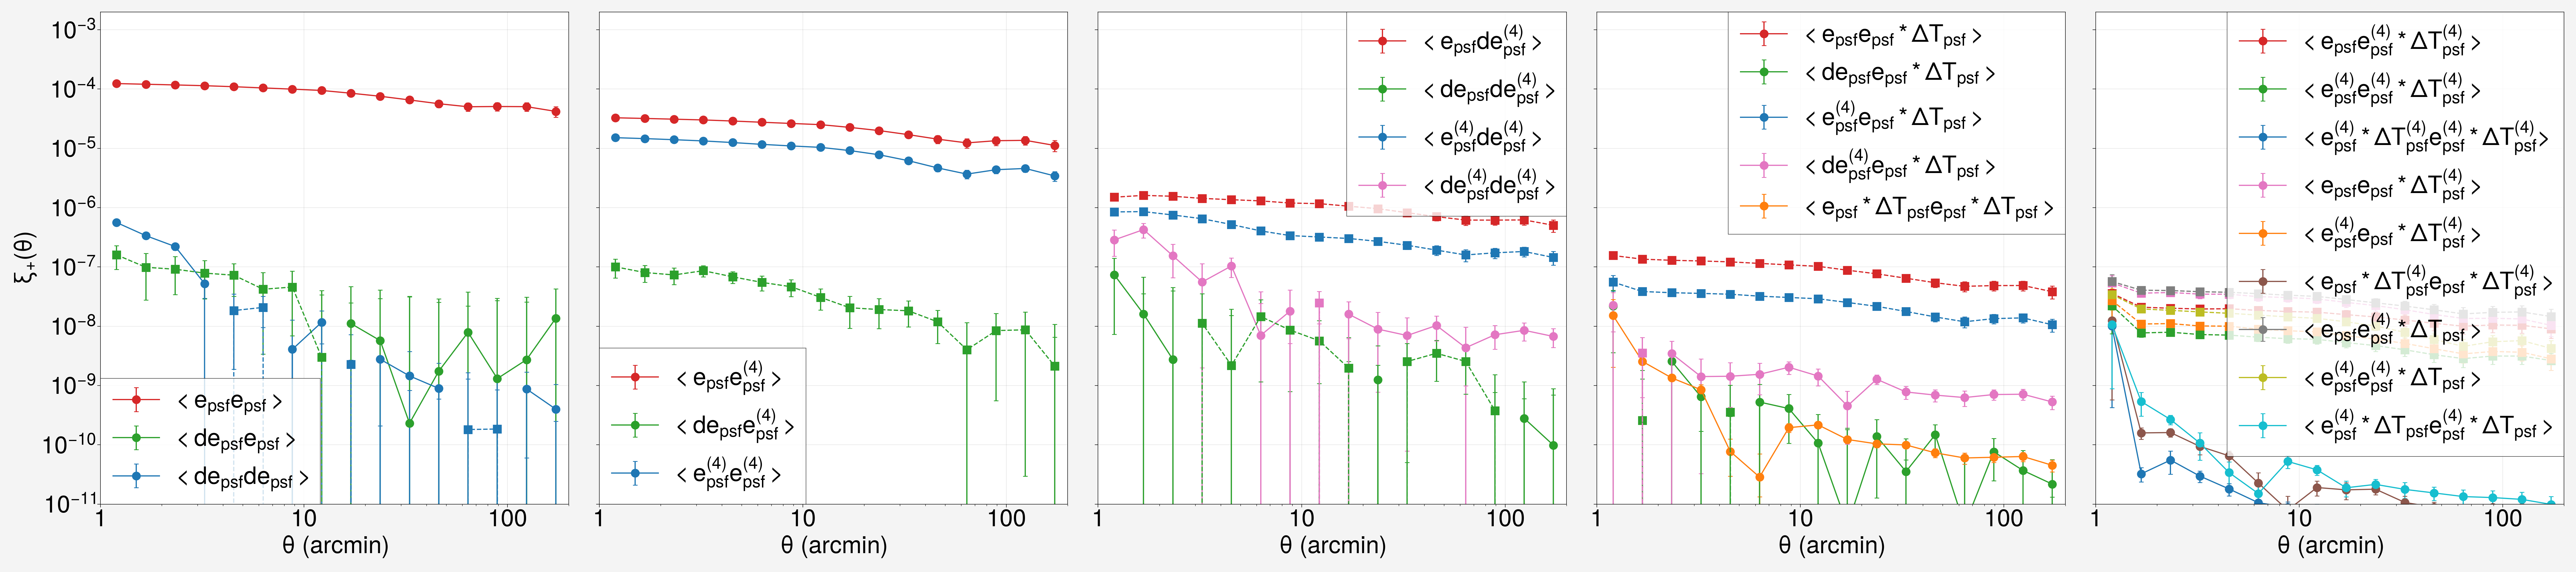

In [120]:
show_pp_corr(fourth_model[0], fourth_model[2], fourth_model[6], save=outpath2)

# Check covariance matrices (07/26/2023)

In [4]:
with open(os.path.join(outpath, "full_correlation_psf.pkl"), "rb") as f:
    d = pickle.load(f)
pp_joint_cov = d[7]

In [26]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [9]:
pp_joint_cov.shape

(400, 400)

In [5]:
covmat = np.loadtxt(outpath+'gp_covariance_psf.txt')

In [18]:
covmat = np.diag(np.diag(covmat))

In [5]:
np.linalg.slogdet(covmat)

(1.0, -5618.763235804844)

In [37]:
def compute_logdet(cov, m):
    arr = [m for i in range(len(cov))]
    m = np.diag(arr)
    new_cov = m * cov
    sign,det = np.linalg.slogdet(new_cov)
    denom = np.sum(np.log(arr))
    return det/denom

def compute_det_cholesky(cov):
    L = np.linalg.cholesky(cov)
    return 2*np.sum(np.log(np.diag(L)))

In [39]:
compute_logdet(covmat, 1e12)

-0.20042807684276104

In [40]:
compute_det_cholesky(covmat)

-5618.763235804845

In [6]:
# Make covariance from mock data
sims = os.path.join(outpath, 'sims')
nbins=8
ncorr=8
obs = np.zeros((200, nbins*ncorr))
for i in range(200):
    with open(os.path.join(sims, 'full_correlation_psf_'+str(i+1)+'.pkl'), 'rb') as f:
        gp_all = pickle.load(f)
        gp_full = gp_all[1]
    obs[i, 0:nbins*ncorr] = np.concatenate((gp_full[0,:], gp_full[1,:], gp_full[2,:], gp_full[3,:], gp_full[4,:], gp_full[5,:], gp_full[6,:], gp_full[7,:]))

B=(200-nbins*ncorr-2)/((200-nbins*ncorr-1)*(200-nbins*ncorr-4))
f_hartlap = (200-1)*(1+B*(nbins*ncorr-ncorr))/(200-nbins*ncorr+ncorr-1)
gp_corr_cov = np.cov(obs.T) * f_hartlap

In [29]:
np.linalg.slogdet(gp_corr_cov)

(1.0, -5367.360900822935)

Text(0.5, 1.0, 'Sim Cov Mat')

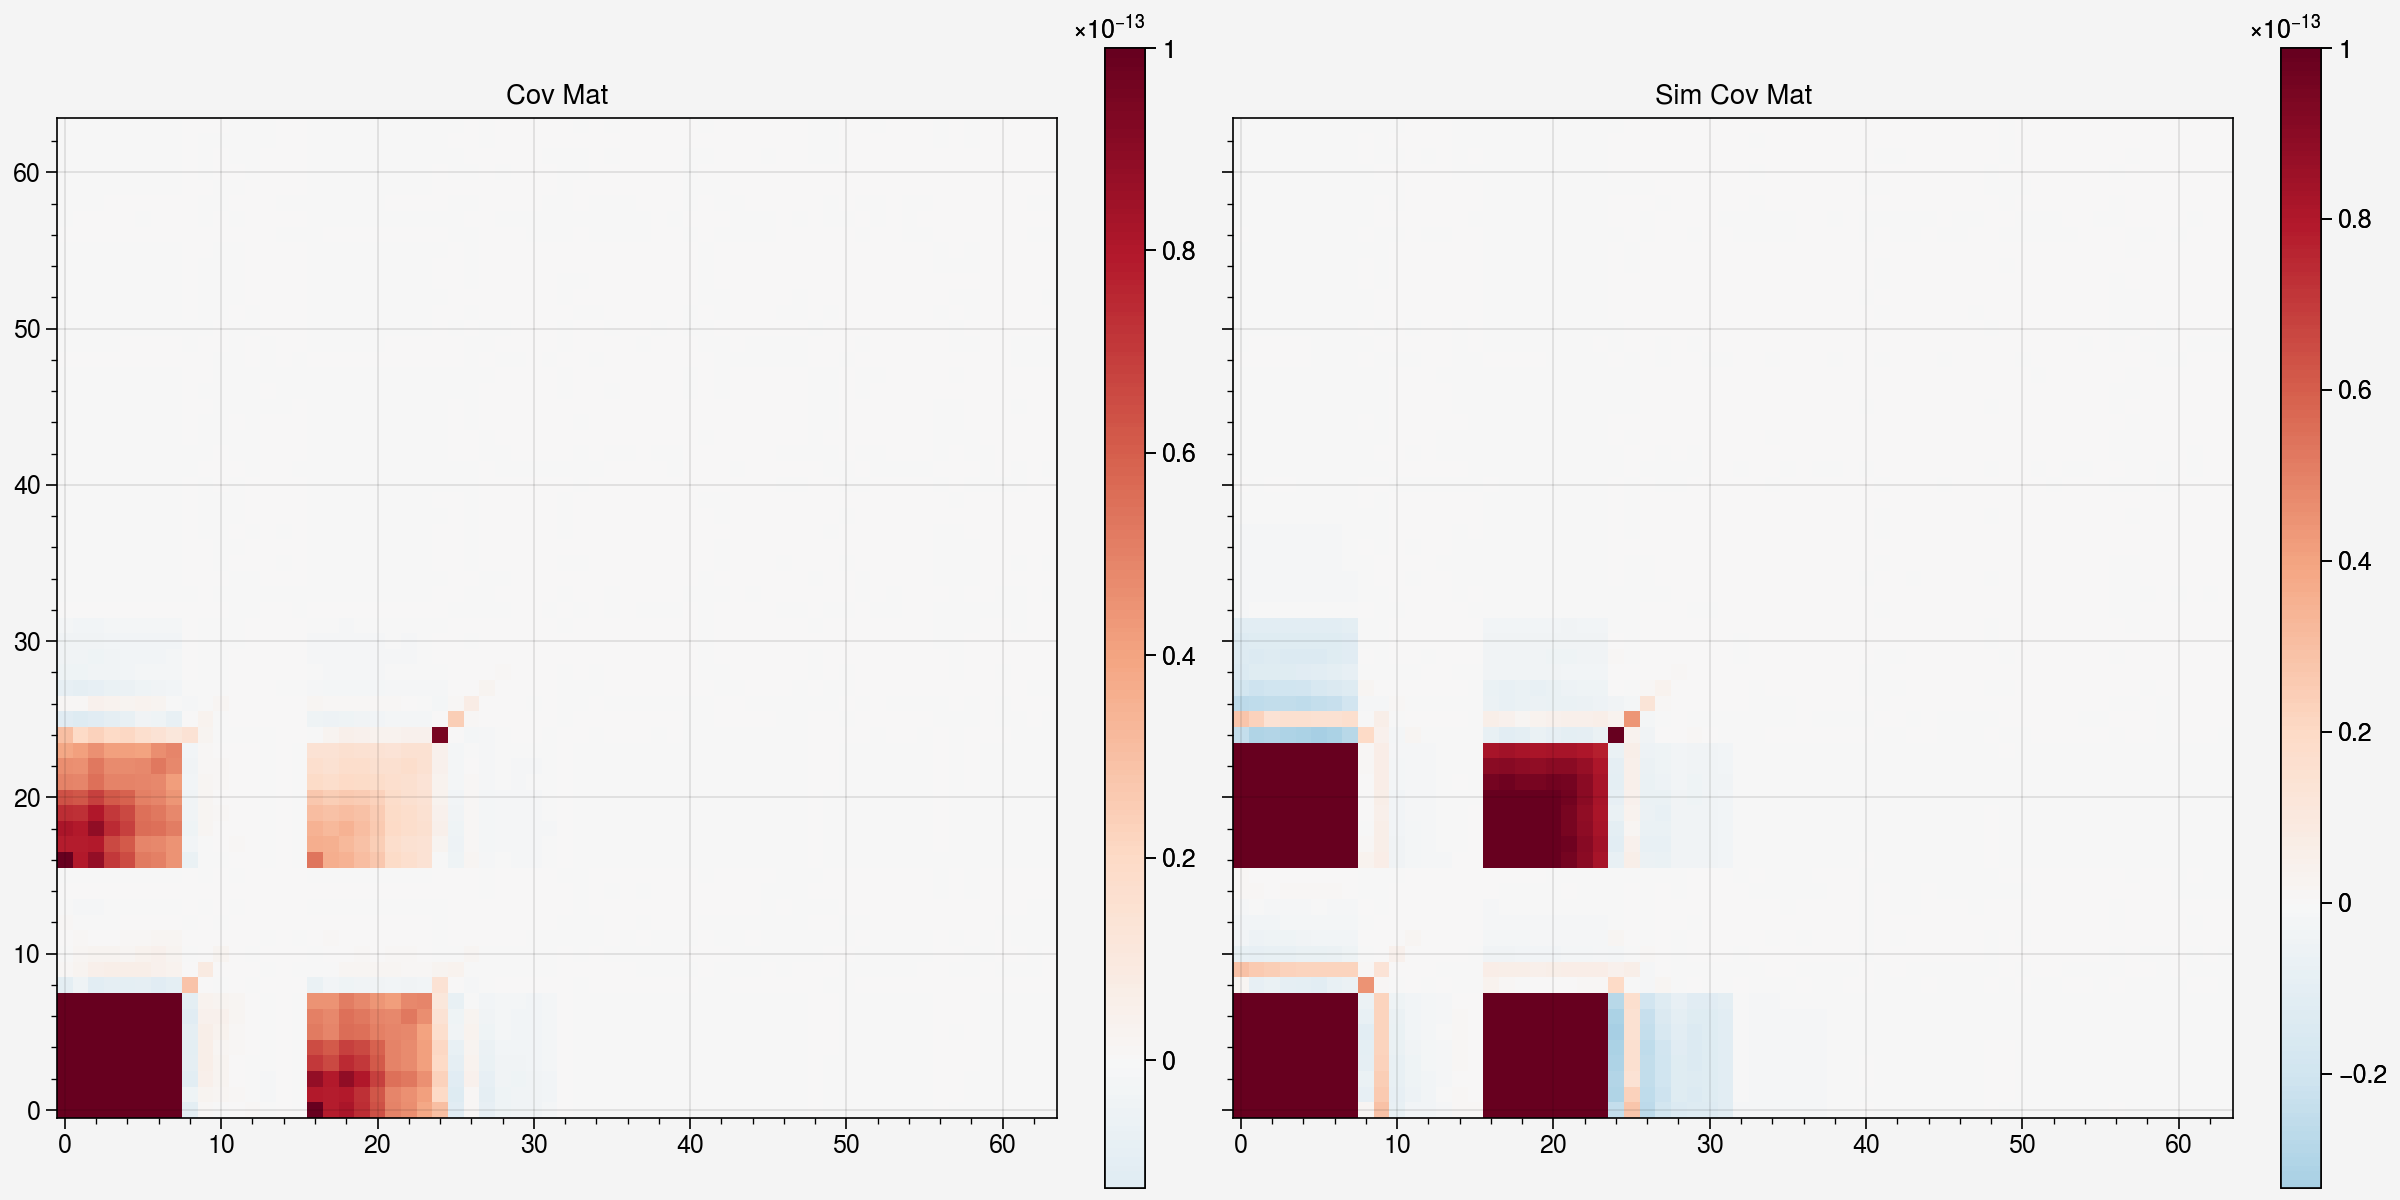

In [7]:
from matplotlib.colors import LogNorm
fig,ax=pplt.subplots(nrows=1, ncols=2, figsize=(12,6))
im=ax[0].imshow(covmat, origin='lower', vmax=1e-13)
fig.colorbar(im, ax=ax[0],)
ax[0].set_title('Cov Mat')

im=ax[1].imshow(gp_corr_cov, origin='lower', vmax=1e-13)
fig.colorbar(im, ax=ax[1],)
ax[1].set_title('Sim Cov Mat')

<ipython-input-10-75df4ade067e>:27: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
<ipython-input-10-75df4ade067e>:31: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: divide by zero encountered in log10
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: invalid value encountered in subtract
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]


[1.08317394 1.22148021 1.21774057 1.49575264 1.47594297 1.52660424
 1.49099505 1.48497486 1.54096898 1.54871469 1.59707954 1.65409998
 1.57524312 1.6288082  1.58243288 1.5108518 ]


<ipython-input-10-75df4ade067e>:27: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
<ipython-input-10-75df4ade067e>:31: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: divide by zero encountered in log10
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: invalid value encountered in subtract
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]


[0.83465157 0.84470668 0.73218369 0.93832163 0.82163685 0.94581048
 1.01040998 0.87832085 0.97974107 0.95563844 1.20240013 1.02964901
 1.05209871 1.25535973 1.35720879 1.36589273]


<ipython-input-10-75df4ade067e>:27: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
<ipython-input-10-75df4ade067e>:31: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: divide by zero encountered in log10
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: invalid value encountered in subtract
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]


[1.00289833 1.14850345 1.24215518 1.5309533  1.66497486 1.62139491
 1.61019937 1.56330249 1.60434929 1.59376295 1.57572391 1.53883081
 1.49646557 1.54020676 1.49481126 1.4378135 ]


<ipython-input-10-75df4ade067e>:27: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
<ipython-input-10-75df4ade067e>:31: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: divide by zero encountered in log10
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: invalid value encountered in subtract
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]


[0.81060768 0.57767305 0.70827834 0.70478949 0.63464779 0.74007218
 0.69714788 0.76239265 0.79978795 0.62468555 0.80415742 0.93327643
 0.77677709 1.12156448 1.09710997 1.23070371]


<ipython-input-10-75df4ade067e>:27: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
<ipython-input-10-75df4ade067e>:31: RuntimeWarning: divide by zero encountered in log10
  im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: divide by zero encountered in log10
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
<ipython-input-10-75df4ade067e>:35: RuntimeWarning: invalid value encountered in subtract
  diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]


[0.35599143 0.81096397 0.85615212 0.95472625 0.80389894 0.83924663
 1.07769496 0.99569903 1.06185661 1.26049701 1.12759263 1.35341951
 1.20920023 1.47050839 1.31153476 1.45221348]


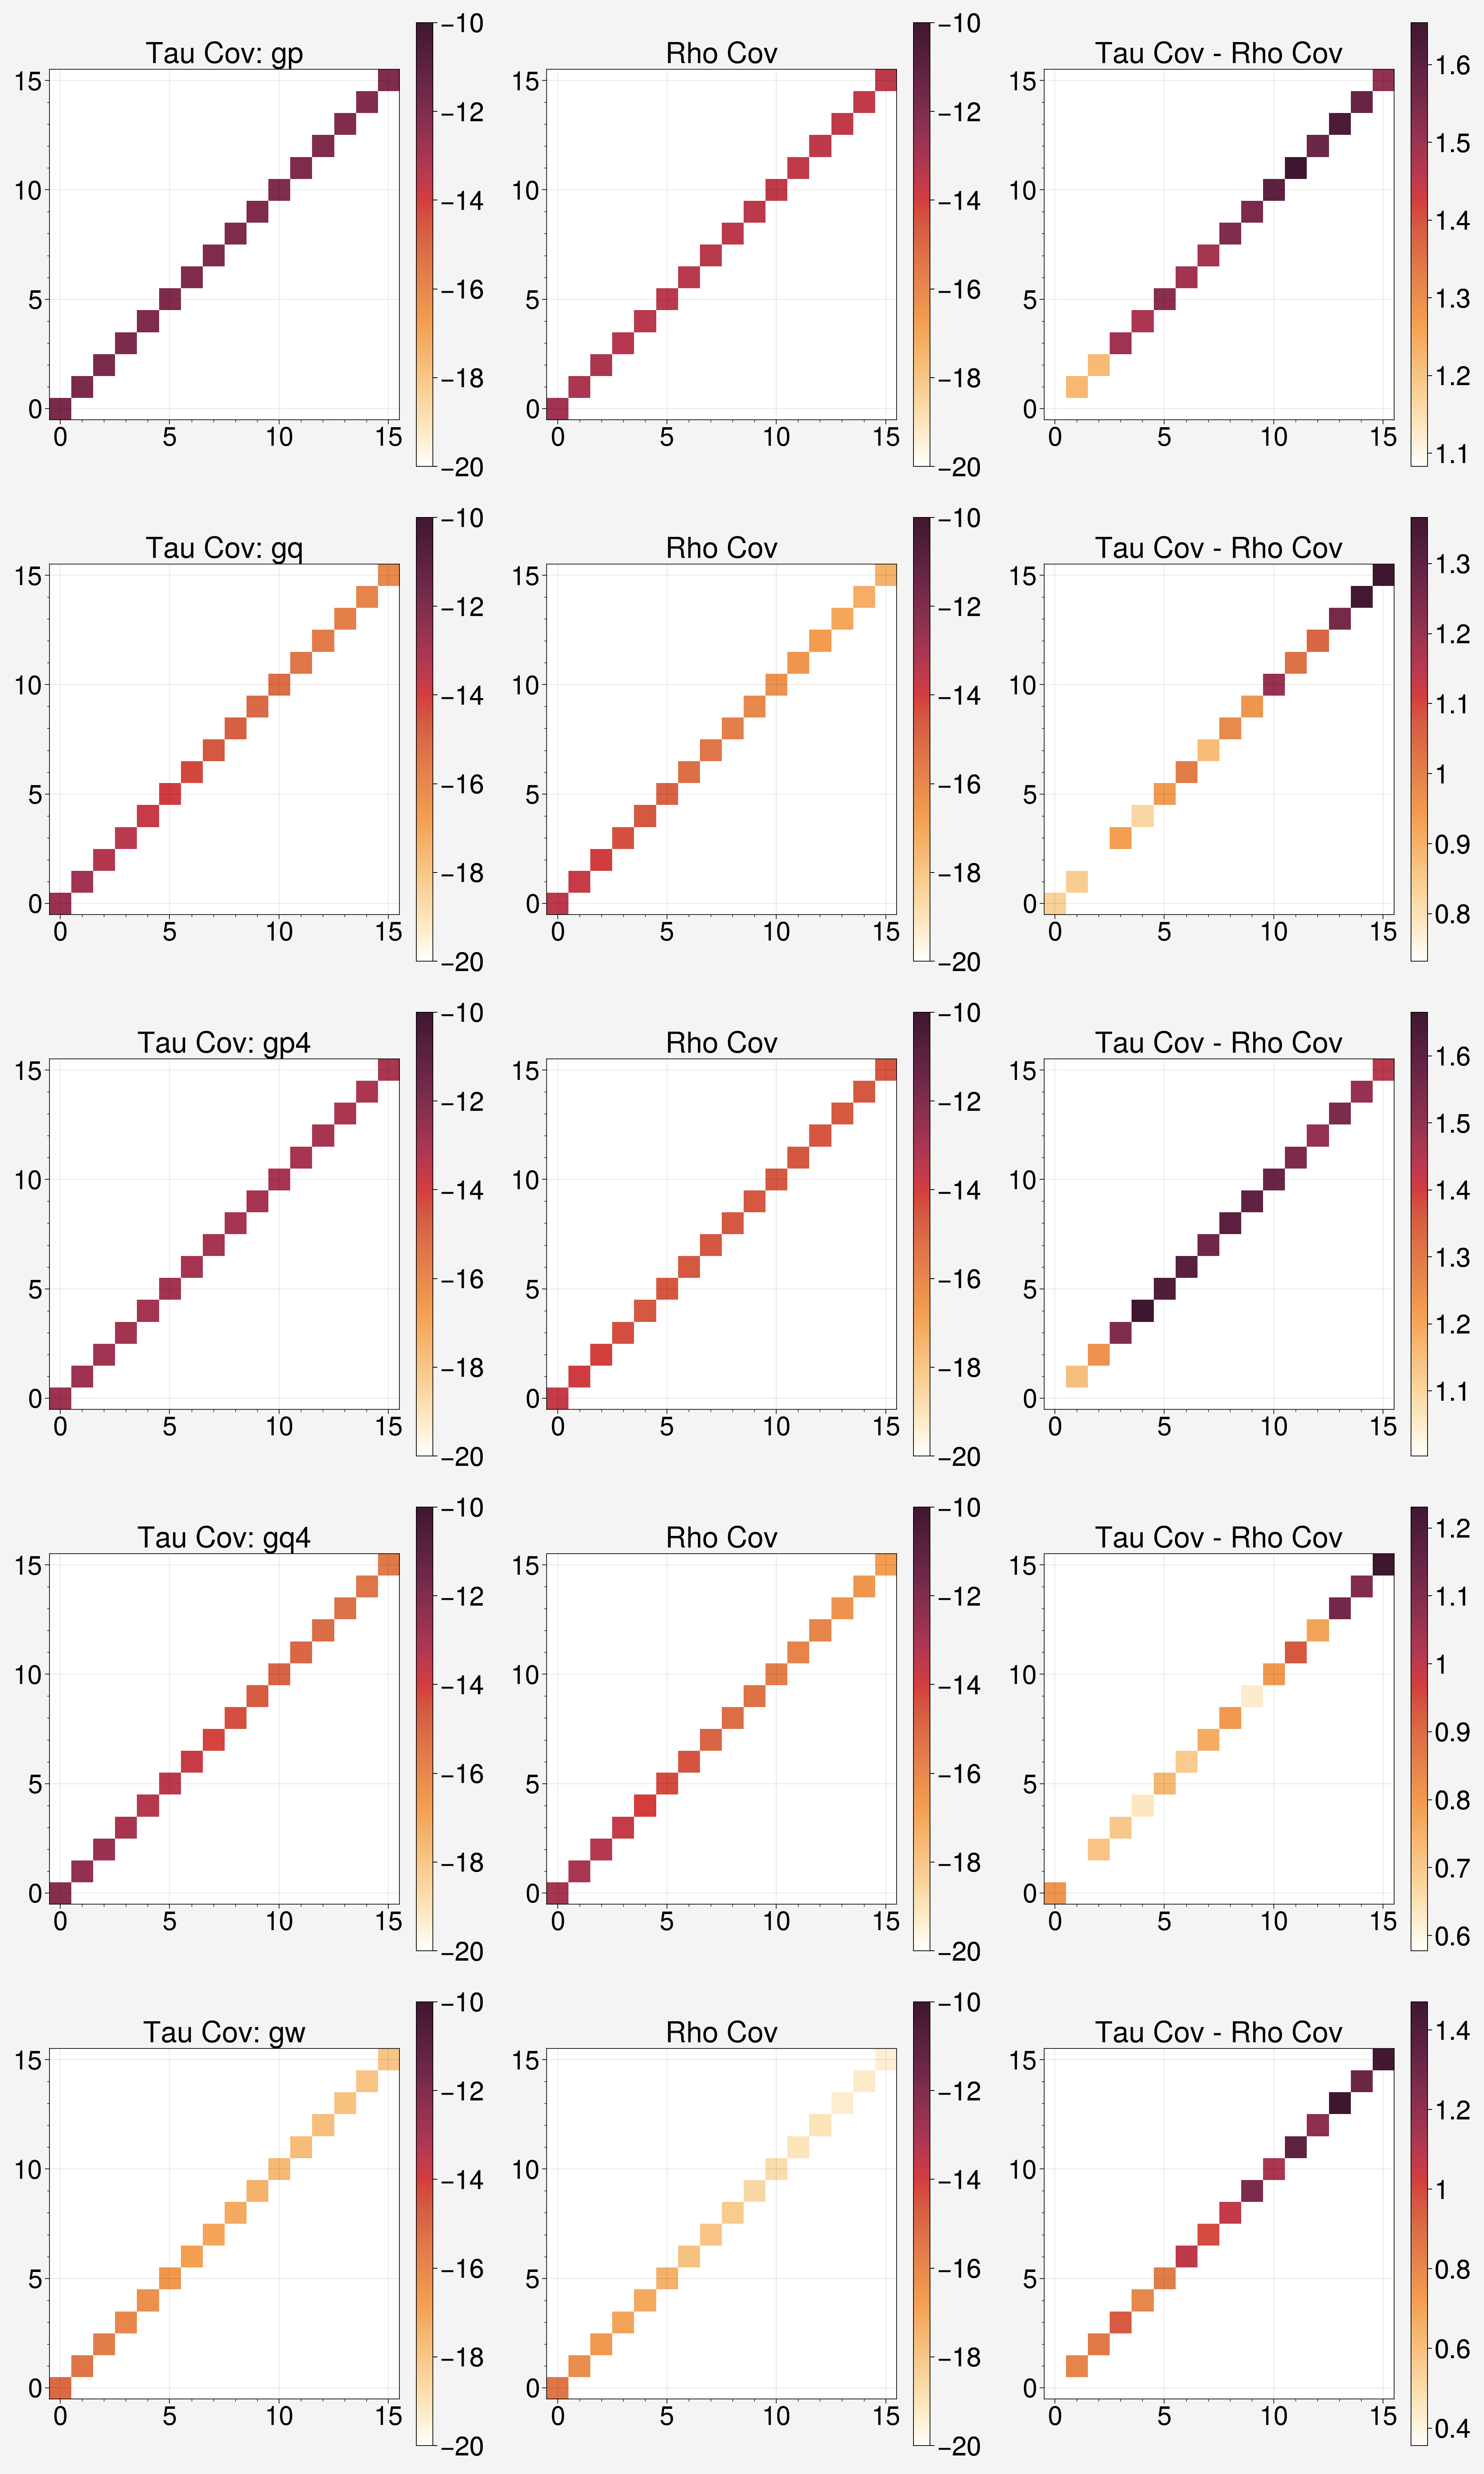

In [10]:
## from matplotlib.colors import LogNorm
def construct_param_matrix(param, num_of_corr, nbins, parametrize=True):

    if parametrize: 
        res = np.zeros(shape=(num_of_corr*nbins, num_of_corr*num_of_corr*nbins))

        basic_block = np.zeros(shape=(nbins, num_of_corr*nbins))
        for i in range(num_of_corr):
            basic_block[0:nbins, i * nbins : (i + 1) * nbins] = np.diag([param[i]] * nbins)

        for i in range(num_of_corr):
            res[i * nbins : (i + 1) * nbins, i*num_of_corr*nbins : (i + 1)*num_of_corr*nbins] = basic_block
    else:
        res = np.ones(shape=(num_of_corr*nbins, num_of_corr*num_of_corr*nbins))

    return res

param = [0.008, 0.834, 0.033, 2.390, -2.353]
# param = [-3.1e-4, 0.077, 11.7e-4]
param_matrix = construct_param_matrix(param, ncorr, nbins)
pp_cov = np.zeros(shape=(ncorr*nbins, ncorr*nbins))
pp_cov[0:ncorr*nbins, 0:ncorr*nbins] = (param_matrix @ pp_joint_cov) @ param_matrix.T

tau = ['gp', 'gq', 'gp4', 'gq4', 'gw']
# tau = ['gp', 'gq', 'gw']
matplotlib.rcParams.update({'font.size': 23, 'legend.fontsize':'medium', 'lines.markersize':10})
fig,ax=pplt.subplots(nrows=5, ncols=3, figsize=(18,30), sharex=False, sharey=False)
for i in range(5):
    im=ax[i,0].imshow(np.log10(np.diag(np.diag(gp_corr_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower',vmin=-10,vmax=-20, )
    fig.colorbar(im, ax=ax[i,0],)
    ax[i,0].set_title('Tau Cov: '+tau[i])

    im=ax[i,1].imshow(np.log10(np.diag(np.diag(pp_cov[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]))), origin='lower', vmin=-10, vmax=-20)
    fig.colorbar(im, ax=ax[i,1],)
    ax[i,1].set_title('Rho Cov')

    diff = (np.log10(np.diag(np.diag(gp_corr_cov))) - np.log10(np.diag(np.diag(pp_cov))))[i*nbins:(i+1)*nbins,i*nbins:(i+1)*nbins]
    print(np.diag(diff))
    im=ax[i,2].imshow(diff, origin='lower',)
    fig.colorbar(im, ax=ax[i,2],)
    ax[i,2].set_title('Tau Cov - Rho Cov')
## plt.savefig(os.path.join(outpath, 'covmat_tau_rho.png'))

In [ ]:
tau = ['gp', 'gq', 'gp4', 'gq4', 'gw']
fig,ax=pplt.subplots(nrows=5, ncols=2, figsize=(12,30), sharex=False, sharey=False)
for i in range(5):
    im=ax[i,0].imshow(np.log10(gp_corr_cov[i*32:(i+1)*32,i*32:(i+1)*32]), origin='lower',vmin=-10,vmax=-24, )
    fig.colorbar(im, ax=ax[i,0],)
    ax[i,0].set_aspect('auto')
    ax[i,0].set_title('Tau Cov: '+tau[i])
    
    im=ax[i,1].imshow(np.log10(ppcov[i*5*32:(i+1)*5*32, i*5*32:(i+1)*5*32]), origin='lower', vmin=-10, vmax=-24)
    fig.colorbar(im, ax=ax[i,1],)
    ax[i,1].set_title('Rho Cov: '+str(i))
plt.savefig(os.path.join(outpath, 'covmat_tau_rho.png'))

In [42]:
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

Text(0.5, 1.0, 'Sim Cov Mat')

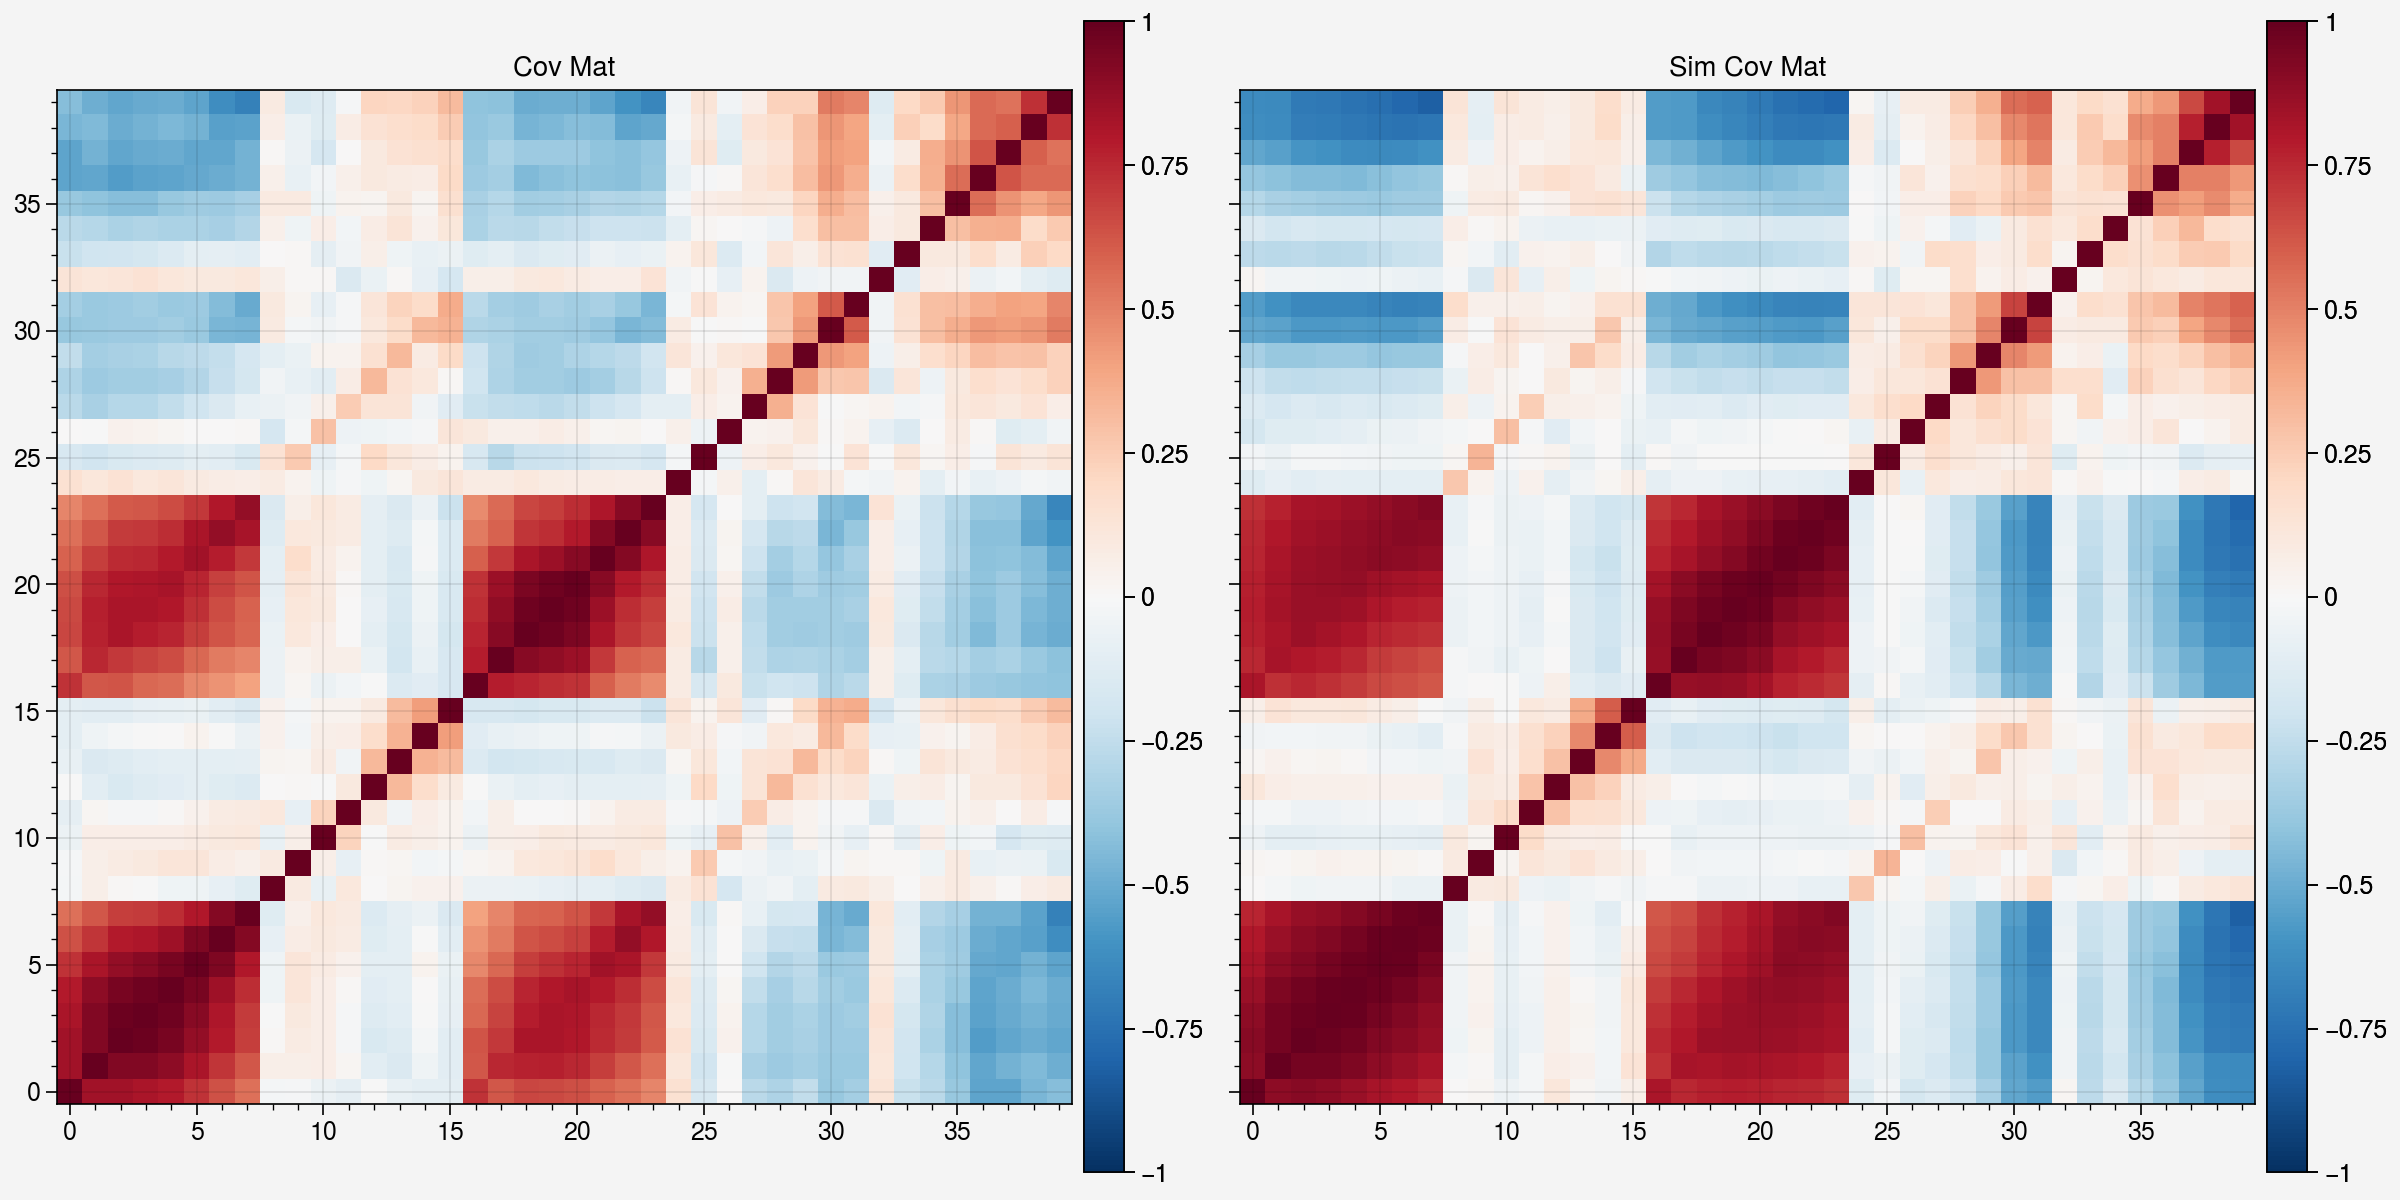

In [44]:
from matplotlib.colors import LogNorm
fig,ax=pplt.subplots(nrows=1, ncols=2, figsize=(12,6))
im=ax[0].imshow(correlation_from_covariance(covmat), origin='lower', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax[0],)
ax[0].set_title('Cov Mat')

im=ax[1].imshow(correlation_from_covariance(gp_corr_cov), origin='lower', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax[1],)
ax[1].set_title('Sim Cov Mat')

In [12]:
def show_pp_corr(r,pp_corr_xip,pp_corr_cov,save=False):
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['tab:red','tab:green','tab:blue','tab:pink', 'tab:orange'])
    matplotlib.rcParams.update({'font.size': 30, 'legend.fontsize':'medium', 'lines.markersize':10})
    
    fig,ax = pplt.subplots(nrows=1,ncols=4,figsize = (35,10),sharex=False,sharey=True)
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
    ax[0].errorbar(r, pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
    ax[0].errorbar(r, pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
    ax[0].errorbar(r, pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$<de_{psf} de_{psf}>$')
    # ax[0].plot(r, pp_corr_xip[0][0], linewidth = 4,alpha = 0.8, color = cmap.colors[0], label = '$<e_{psf} e_{psf}>$' )
    # ax[0].plot(r, pp_corr_xip[0][1], linewidth = 4,alpha = 0.8, color = cmap.colors[1],label = '$<de_{psf} e_{psf}>$' )
    # ax[0].plot(r, pp_corr_xip[1][1],  linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$<de_{psf} de_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
    ax[0].errorbar(r, -pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
    ax[0].errorbar(r, -pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
    ax[0].errorbar(r, -pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    # ax[0].plot(r, -pp_corr_xip[0][0],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[0])
    # ax[0].plot(r, -pp_corr_xip[0][1],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[1])
    # ax[0].plot(r, -pp_corr_xip[1][1],'--', linewidth = 4,alpha = 0.8,color = cmap.colors[2])

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlim([1,200])
    ax[0].set_ylim(2e-8,2e-3)
    ax[0].set_xlabel(r'$\theta$ (arcmin)')
    ax[0].legend(ncol=1)

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][0]))
    ax[1].errorbar(r, pp_corr_xip[2][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][1]))
    ax[1].errorbar(r, pp_corr_xip[2][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][2]))
    ax[1].errorbar(r, pp_corr_xip[2][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$<e^{(4)}_{psf} e^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} M^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} M^{(4)}_{psf}>$')
    # ax[1].plot(r, pp_corr_xip[2][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2], label = '$<M^{(4)}_{psf} M^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][0]))
    ax[1].errorbar(r, -pp_corr_xip[2][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][1]))
    ax[1].errorbar(r, -pp_corr_xip[2][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[2][2]))
    ax[1].errorbar(r, -pp_corr_xip[2][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    # ax[1].plot(r, -pp_corr_xip[2][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[1].plot(r, -pp_corr_xip[2][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[1].plot(r, -pp_corr_xip[2][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8, )
    
    
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlim([1,200])
    ax[1].set_ylim(2e-8,2e-3)
    ax[1].set_xlabel(r'$\theta$ (arcmin)')
    ax[1].legend(ncol=1)

    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][0]))
    ax[2].errorbar(r, pp_corr_xip[3][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][1]))
    ax[2].errorbar(r, pp_corr_xip[3][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][2]))
    ax[2].errorbar(r, pp_corr_xip[3][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$< e^{(4)}_{psf} de^{(4)}_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][3]))
    ax[2].errorbar(r, pp_corr_xip[3][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='o-', label = '$< de^{(4)}_{psf} de^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$< M^{(4)}_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][3],linewidth = 4,alpha = 0.8,color = cmap.colors[3], label = '$< dM^{(4)}_{psf} dM^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][0]))
    ax[2].errorbar(r, -pp_corr_xip[3][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][1]))
    ax[2].errorbar(r, -pp_corr_xip[3][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][2]))
    ax[2].errorbar(r, -pp_corr_xip[3][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[3][3]))
    ax[2].errorbar(r, -pp_corr_xip[3][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='s--', )
    # ax[2].plot(r, -pp_corr_xip[3][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8,)
    # ax[2].plot(r, -pp_corr_xip[3][3],'--',color = cmap.colors[3],linewidth = 4,alpha = 0.8,)


    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    ax[2].set_xlim([1,200])
    ax[2].set_ylim(2e-8,2e-3)
    ax[2].set_xlabel(r'$\theta$ (arcmin)')
    ax[2].legend(ncol=1)
    
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][0]))
    ax[3].errorbar(r, pp_corr_xip[4][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][1]))
    ax[3].errorbar(r, pp_corr_xip[4][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e_{psf}*\Delta T_{psf}$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][2]))
    ax[3].errorbar(r, pp_corr_xip[4][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$< e^{(4)}_{psf} e_{psf}*\Delta T_{psf}$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][3]))
    ax[3].errorbar(r, pp_corr_xip[4][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='o-', label = '$< de^{(4)}_{psf} e_{psf}*\Delta T_{psf}>$')
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][4]))
    ax[3].errorbar(r, pp_corr_xip[4][4], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='o-', label = '$< e_{psf}*\Delta T_{psf} e_{psf}*\Delta T_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][0],linewidth = 4,alpha = 0.8,color = cmap.colors[0], label = '$<e_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][1],linewidth = 4,alpha = 0.8,color = cmap.colors[1], label = '$<de_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][2],linewidth = 4,alpha = 0.8,color = cmap.colors[2],label = '$< M^{(4)}_{psf} dM^{(4)}_{psf}>$')
    # ax[2].plot(r, pp_corr_xip[3][3],linewidth = 4,alpha = 0.8,color = cmap.colors[3], label = '$< dM^{(4)}_{psf} dM^{(4)}_{psf}>$')
    
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][0]))
    ax[3].errorbar(r, -pp_corr_xip[4][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][1]))
    ax[3].errorbar(r, -pp_corr_xip[4][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][2]))
    ax[3].errorbar(r, -pp_corr_xip[4][2], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][3]))
    ax[3].errorbar(r, -pp_corr_xip[4][3], yerr=pp_corr_xip_err, color=cmap.colors[3], fmt='s--', )
    pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[4][4]))
    ax[3].errorbar(r, -pp_corr_xip[4][4], yerr=pp_corr_xip_err, color=cmap.colors[4], fmt='s--', )
    # ax[2].plot(r, -pp_corr_xip[3][0],'--',color = cmap.colors[0],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][1],'--',color = cmap.colors[1],linewidth = 4,alpha = 0.8, )
    # ax[2].plot(r, -pp_corr_xip[3][2],'--',color = cmap.colors[2],linewidth = 4,alpha = 0.8,)
    # ax[2].plot(r, -pp_corr_xip[3][3],'--',color = cmap.colors[3],linewidth = 4,alpha = 0.8,)

    ax[3].set_xscale('log')
    ax[3].set_yscale('log')
    ax[3].set_xlim([1,200])
    ax[3].set_ylim(2e-8,2e-3)
    ax[3].set_xlabel(r'$\theta$ (arcmin)')
    ax[3].legend(ncol=1)
    
    plt.yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], ['$10^{-9}$', '$10^{-8}$', '$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$'])
    ax[0].set_ylabel(r'$\xi_{+}(\theta)$')
    
    if save:
        plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/final_v5/psf_systematics_taus.pdf', bbox_inches='tight')

In [19]:
def plot_overall_rho(work, name,):

    base_keys = ['riz']
    keys = [ name+'_' + k for k in base_keys ]

    for key in keys:
        stat_file = os.path.join(work, "rho_" + key + ".json")
        if not os.path.isfile(stat_file):
            print('File not found: ',stat_file,' (skipping)')
            continue

        # Read the json file 
        print('Read %s'%stat_file)
        with open(stat_file,'r') as f:
            stats = json.load(f)

        #print' stats = ',stats
        if len(stats) == 1:  # I used to save a list of length 1 that in turn was a list
            stats = stats[0]

        print('len(stats) = ',len(stats))
        ( meanlogr,
          rho1p,
          rho1p_im,
          rho1m,
          rho1m_im,
          var1p,
          var1m,
          rho2p,
          rho2p_im,
          rho2m,
          rho2m_im,
          var2p,
          var2m,
          rho3p,
          rho3p_im,
          rho3m,
          rho3m_im,
          var3p,
          var3m,
          rho4p,
          rho4p_im,
          rho4m,
          rho4m_im,
          var4p,
          var4m,
          rho5p,
          rho5p_im,
          rho5m,
          rho5m_im,
          var5p,
          var5m,
        ) = stats[:31]

        meanr = np.exp(meanlogr)
        rho1p = np.array(rho1p)
        rho1m = np.array(rho1m)
        rho2p = np.array(rho2p)
        rho2m = np.array(rho2m)
        rho3p = np.array(rho3p)
        rho3m = np.array(rho3m)
        rho4p = np.array(rho4p)
        rho4m = np.array(rho4m)
        rho5p = np.array(rho5p)
        rho5m = np.array(rho5m)
        sig_rho1 = np.sqrt(var1p)
        sig_rho2 = np.sqrt(var2p)
        sig_rho3 = np.sqrt(var3p)
        sig_rho4 = np.sqrt(var4p)
        sig_rho5 = np.sqrt(var5p)
        sqrtn = 1

        cols = [meanr,
                rho1p, rho1m, sig_rho1,
                rho2p, rho2m, sig_rho2,
                rho3p, rho3m, sig_rho3,
                rho4p, rho4m, sig_rho4,
                rho5p, rho5m, sig_rho5]
        header = ('meanr  '+
                  'rho1  rho1_xim  sig_rho1  '+
                  'rho2  rho2_xim  sig_rho2  '+
                  'rho3  rho3_xim  sig_rho3  '+
                  'rho4  rho4_xim  sig_rho4  '+
                  'rho5  rho5_xim  sig_rho5  ')

        if len(stats) > 31:
            ( rho0p,
              rho0p_im,
              rho0m,
              rho0m_im,
              var0p,
              var0m,
            ) = stats[31:37]
            rho0p = np.array(rho0p)
            rho0m = np.array(rho0m)
            sig_rho0 = np.sqrt(var0p)
            cols += [rho0p, rho0m, sig_rho0]
            header += 'rho0  rho0_xim  sig_rho0  '
            
        return meanr, rho0p, sig_rho0, rho1p, sig_rho1, rho2p, sig_rho2, sqrtn

#         outfile = work+'rho_' + key + '.dat'
#         np.savetxt(outfile, np.array(cols), fmt='%.6e', header=header)
#         print('wrote',outfile,len(cols))
 
#         fig,ax = pplt.subplots(nrows=1, ncols=3, figsize=(19,6), sharex=False, sharey=False)
#         pretty_rho1(ax[0], meanr, rho1p, sig_rho1, sqrtn, rho3p, sig_rho3, rho4p, sig_rho4,
#                     gband=(key.endswith('g')))
#         # plt.savefig('rho1_' + key + '.pdf')

#         pretty_rho2(ax[1], meanr, rho2p, sig_rho2, sqrtn, rho5p, sig_rho5,
#                     gband=(key.endswith('g')))
#         # plt.savefig('rho2_' + key + '.pdf')

#         if len(stats) > 31:
#             pretty_rho0(ax[2], meanr, rho0p, sig_rho0, sqrtn)
#             # plt.savefig('rho0_' + key + '.pdf')
    

In [13]:
with open(outpath + "full_correlation_psf.pkl", 'rb') as f:
    fourth_model = pickle.load(f)

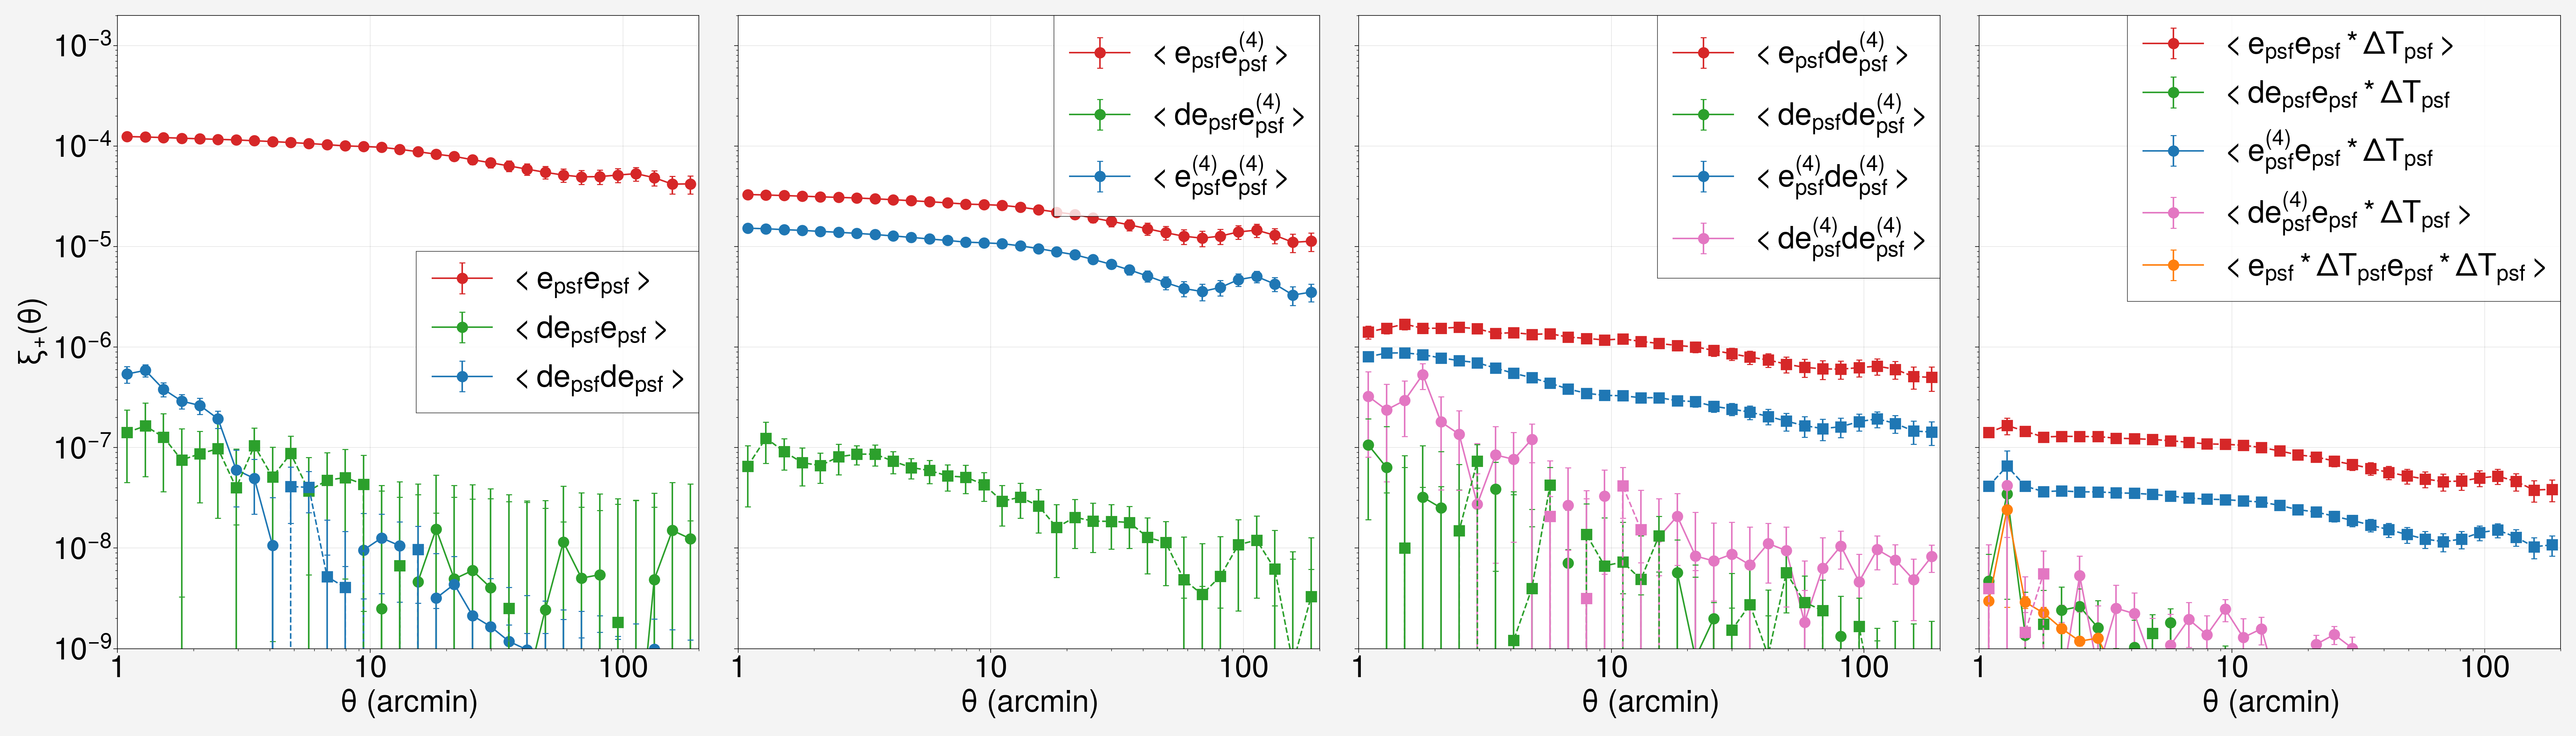

In [14]:
show_pp_corr(fourth_model[0], fourth_model[2], fourth_model[6], save=False)

Read /pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/rho_all_JK_riz.json
len(stats) =  37


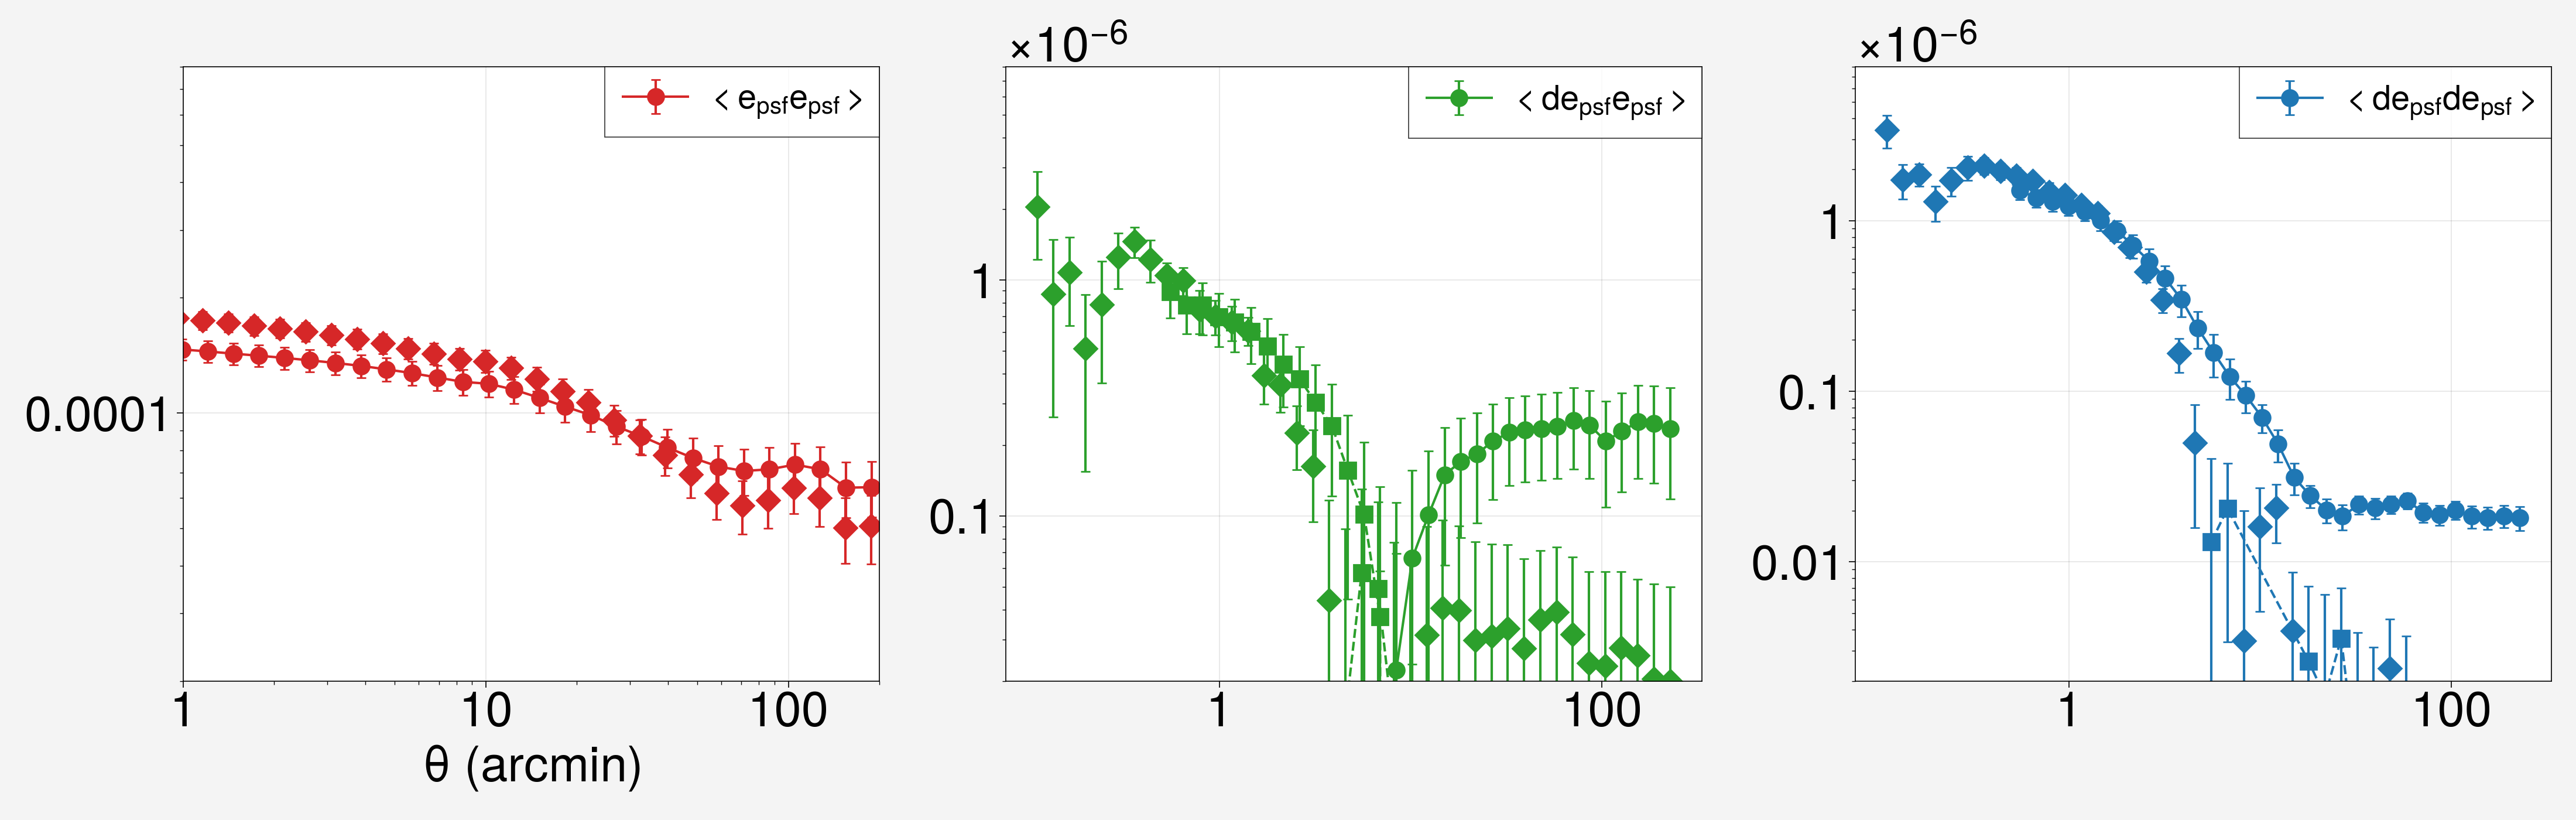

In [49]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['tab:red','tab:green','tab:blue','tab:pink'])
matplotlib.rcParams.update({'font.size': 30, 'legend.fontsize':'x-small', 'lines.markersize':10})
fig,ax = pplt.subplots(nrows=1, ncols=3, figsize=(22,7), sharex=False, sharey=False)

# Read in PSFHOME
r = fourth_model[0]
pp_corr_xip = fourth_model[2]
pp_corr_cov = fourth_model[6]

# Read in DES
name = 'all_JK'
outpath = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/'
meanr, rho0p, sig_rho0, rho1p, sig_rho1, rho2p, sig_rho2, sqrtn = plot_overall_rho(outpath, name,)


pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
ax[0].errorbar(r, pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='o-', label = '$<e_{psf} e_{psf}>$')
ax[0].errorbar(meanr[rho0p>0], rho0p[rho0p>0], yerr=sig_rho0[rho0p>0]/sqrtn, color=cmap.colors[0], fmt='D')

pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
ax[1].errorbar(r, pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='o-', label = '$<de_{psf} e_{psf}>$')
ax[1].errorbar(meanr[rho2p>0], rho2p[rho2p>0], yerr=sig_rho2[rho2p>0]/sqrtn, color=cmap.colors[1], fmt='D')

pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
ax[2].errorbar(r, pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='o-', label = '$<de_{psf} de_{psf}>$')
ax[2].errorbar(meanr[rho1p>0], rho1p[rho1p>0], yerr=sig_rho1[rho1p>0]/sqrtn, color=cmap.colors[2], fmt='D')

pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][0]))
ax[0].errorbar(r, -pp_corr_xip[0][0], yerr=pp_corr_xip_err, color=cmap.colors[0], fmt='s--', )
ax[0].errorbar(meanr[rho0p<0], -rho0p[rho0p<0], yerr=sig_rho0[rho0p<0]/sqrtn, color=cmap.colors[0], fmt='s--')

pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[0][1]))
ax[1].errorbar(r, -pp_corr_xip[0][1], yerr=pp_corr_xip_err, color=cmap.colors[1], fmt='s--', )
ax[1].errorbar(meanr[rho2p<0], -rho2p[rho2p<0], yerr=sig_rho2[rho2p<0]/sqrtn, color=cmap.colors[1], fmt='s--')

pp_corr_xip_err = np.sqrt(np.diag(pp_corr_cov[1][1]))
ax[2].errorbar(r, -pp_corr_xip[1][1], yerr=pp_corr_xip_err, color=cmap.colors[2], fmt='s--', )
ax[2].errorbar(meanr[rho1p<0], -rho1p[rho1p<0], yerr=sig_rho1[rho1p<0]/sqrtn, color=cmap.colors[2], fmt='s--')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim([1,200])
ax[0].set_ylim(2e-5,8e-4)
ax[0].set_xlabel(r'$\theta$ (arcmin)')
ax[0].legend(ncol=1)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(2e-8,8e-6)
ax[1].legend(ncol=1)

ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_ylim(2e-9,8e-6)
ax[2].legend(ncol=1)

# Run MCMC

In [ ]:
with open(outpath+"full_correlation_psf.pkl", "rb") as f:
    (
        r,
        gp_corr,
        pp_corr,
        psf_const1,
        psf_const2,
        egal_mean,
        pp_corr_cov,
        pp_joint_cov,
    ) = pickle.load(f)

In [ ]:
gp_corr

In [3]:
fitsecond_model = psfmod("second", outpath+"gp_covariance_psf.txt", 
                      gal_shape_file="/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5/metadetection_v5_flat_shape_err.fits", 
                      patch_centers="/global/cfs/cdirs/des/y6-shear-catalogs/patches-centers-altrem-npatch200-seed8888.fits", 
                      psf_file=psf_file, 
                      correlation_ready=True, 
                      correlation_file=outpath+"full_correlation_psf.pkl", 
                      fitsecond = True,
                      constant_mode=False, 
                      save_gp_cov=True, 
                      include_pp_cov=False,
                      # chain_len=20000,
                      outpath=outpath, 
                      nbins=32, theta_min=0.5, theta_max=250)
fitsecond_model.go()

fourth_model = psfmod("four", outpath+"gp_covariance_psf.txt", 
                      gal_shape_file="/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5/metadetection_v5_flat_shape_err.fits", 
                      patch_centers="/global/cfs/cdirs/des/y6-shear-catalogs/patches-centers-altrem-npatch200-seed8888.fits", 
                      psf_file=psf_file, 
                      correlation_ready=True, 
                      correlation_file=outpath+"full_correlation_psf.pkl", 
                      constant_mode=False, 
                      save_gp_cov=True, 
                      include_pp_cov=False,
                      # chain_len=20000,
                      outpath=outpath, 
                      nbins=32, theta_min=0.5, theta_max=250)
fourth_model.go()

/global/homes/m/myamamot/miniforge3/envs/eastlake-dev/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


[0. 1. 0. 0.]
start running mcmc
[0. 1. 0. 0.]
start running mcmc


# Plot fit model and correlations

In [4]:
def show_gp_model(fourth_model, fitsecond_model, save=False):
    r = fourth_model.r
    nbins = len(r)
    four_param_model = r'($\alpha, \beta, \alpha^{(4)}, \beta^{(4)}$) model'
    two_param_model = r'($\alpha, \beta$) model'

    matplotlib.rcParams.update({'font.size': 26, 'legend.fontsize':'x-small', 'lines.markersize':8})
    fig,ax = pplt.subplots(nrows=1,ncols=2,figsize = (18,10), sharex=False, sharey=False)

    # leakage errors
    gp0_err = np.sqrt(np.diag(fourth_model.cov)[:nbins])
    gp2_err = np.sqrt(np.diag(fourth_model.cov)[2*nbins:3*nbins])

    ax[0].plot(r, fourth_model.gp_corr[0], 'X', markersize = 10, linewidth = 4.0, alpha = 0.8, label = '$<\hat{e}_{gal} e_{psf}>$' , color = 'blue' )
    ax[0].fill_between(r , fourth_model.gp_corr[0] - gp0_err,fourth_model.gp_corr[0] + gp0_err, color = 'blue' , alpha = 0.2)
    ax[0].plot(r, fourth_model.bestfit_dv[0], 'o-', linewidth = 2,alpha = 0.7,  label = four_param_model, color = 'blue')
    ax[0].plot(r, fitsecond_model.bestfit_dv[0], 'o--', linewidth = 2,alpha = 0.5,  label = two_param_model, color = 'blue')


    ax[0].plot(r, fourth_model.gp_corr[2], 'X', markersize = 10, linewidth = 4.0, alpha = 0.8, label = '$<\hat{e}_{gal} e^{(4)}_{psf}>$' , color = 'red')
    ax[0].fill_between(fourth_model.r, fourth_model.gp_corr[2] - gp2_err,fourth_model.gp_corr[2] + gp2_err,color = 'red' , alpha = 0.2)
    ax[0].plot(r, fourth_model.bestfit_dv[2], 'o-', linewidth = 2, alpha = 0.7, label = four_param_model, color = 'red')


    # ax[0].plot([-1,400], [0,0], '--', color = 'black', linewidth = 4, alpha = 0.7)
    ax[0].legend(ncol = 1)
    ax[0].set_xlim([0.4,250])
    ax[0].set_ylim(-1.5e-6, 1e-6)
    # ax[0].set_title('leakage')
    ax[0].set_xscale('log')
    ax[0].set_xlabel(r'$\theta$ (arcmin)')
    ax[0].set_ylabel(r'$\xi_{+}(\theta)$')


    # modeling errors
    gp1_err = np.sqrt(np.diag(fourth_model.cov)[nbins:2*nbins])
    gp3_err = np.sqrt(np.diag(fourth_model.cov)[3*nbins:4*nbins])

    ax[1].plot(r , fourth_model.gp_corr[1], 'X', markersize = 10, linewidth = 4.0, alpha = 0.8, label = '$<\hat{e}_{gal} \Delta e_{psf}>$' , color = 'blue')
    ax[1].fill_between(r , fourth_model.gp_corr[1] - gp1_err,fourth_model.gp_corr[1] + gp1_err,color = 'blue' , alpha = 0.2)

    ax[1].plot(r, fourth_model.bestfit_dv[1], 'o-', linewidth = 2,alpha = 0.7,  label = four_param_model, color = 'blue')
    ax[1].plot(r, fitsecond_model.bestfit_dv[1], 'o--', linewidth = 2,alpha = 0.5,  label = two_param_model, color = 'blue')

    ax[1].plot(r , fourth_model.gp_corr[3], 'X',markersize = 10, linewidth = 4.0, alpha = 0.8, label = '$<\hat{e}_{gal} \Delta e^{(4)}_{psf}>$' , color = 'red')
    ax[1].fill_between(r, fourth_model.gp_corr[3] - gp3_err,fourth_model.gp_corr[3] + gp3_err,color = 'red' , alpha = 0.3)
    ax[1].plot(r, fourth_model.bestfit_dv[3], 'o-', linewidth = 2,alpha = 0.7,  label = four_param_model, color = 'red')


    ax[1].set_ylim(-1.5e-7, 1e-6)
    # plt.fill_betweenx([-1,1], theta_min,theta_max,color = 'grey' , alpha = 0.2)
    ax[1].set_xscale('log')
    ax[1].set_xlim([0.4,250])
    # plt.plot([-1,400], [0,0], '--', color = 'black', linewidth = 4, alpha = 0.7)
    # ax[1].set_title('modeling error')
    ax[1].set_xlabel(r'$\theta$ (arcmin)')

    if save:
        plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/final_v5/psf_systematics_bestfitxip_model_bootstrap_ppcov_weight.pdf', bbox_inches='tight')

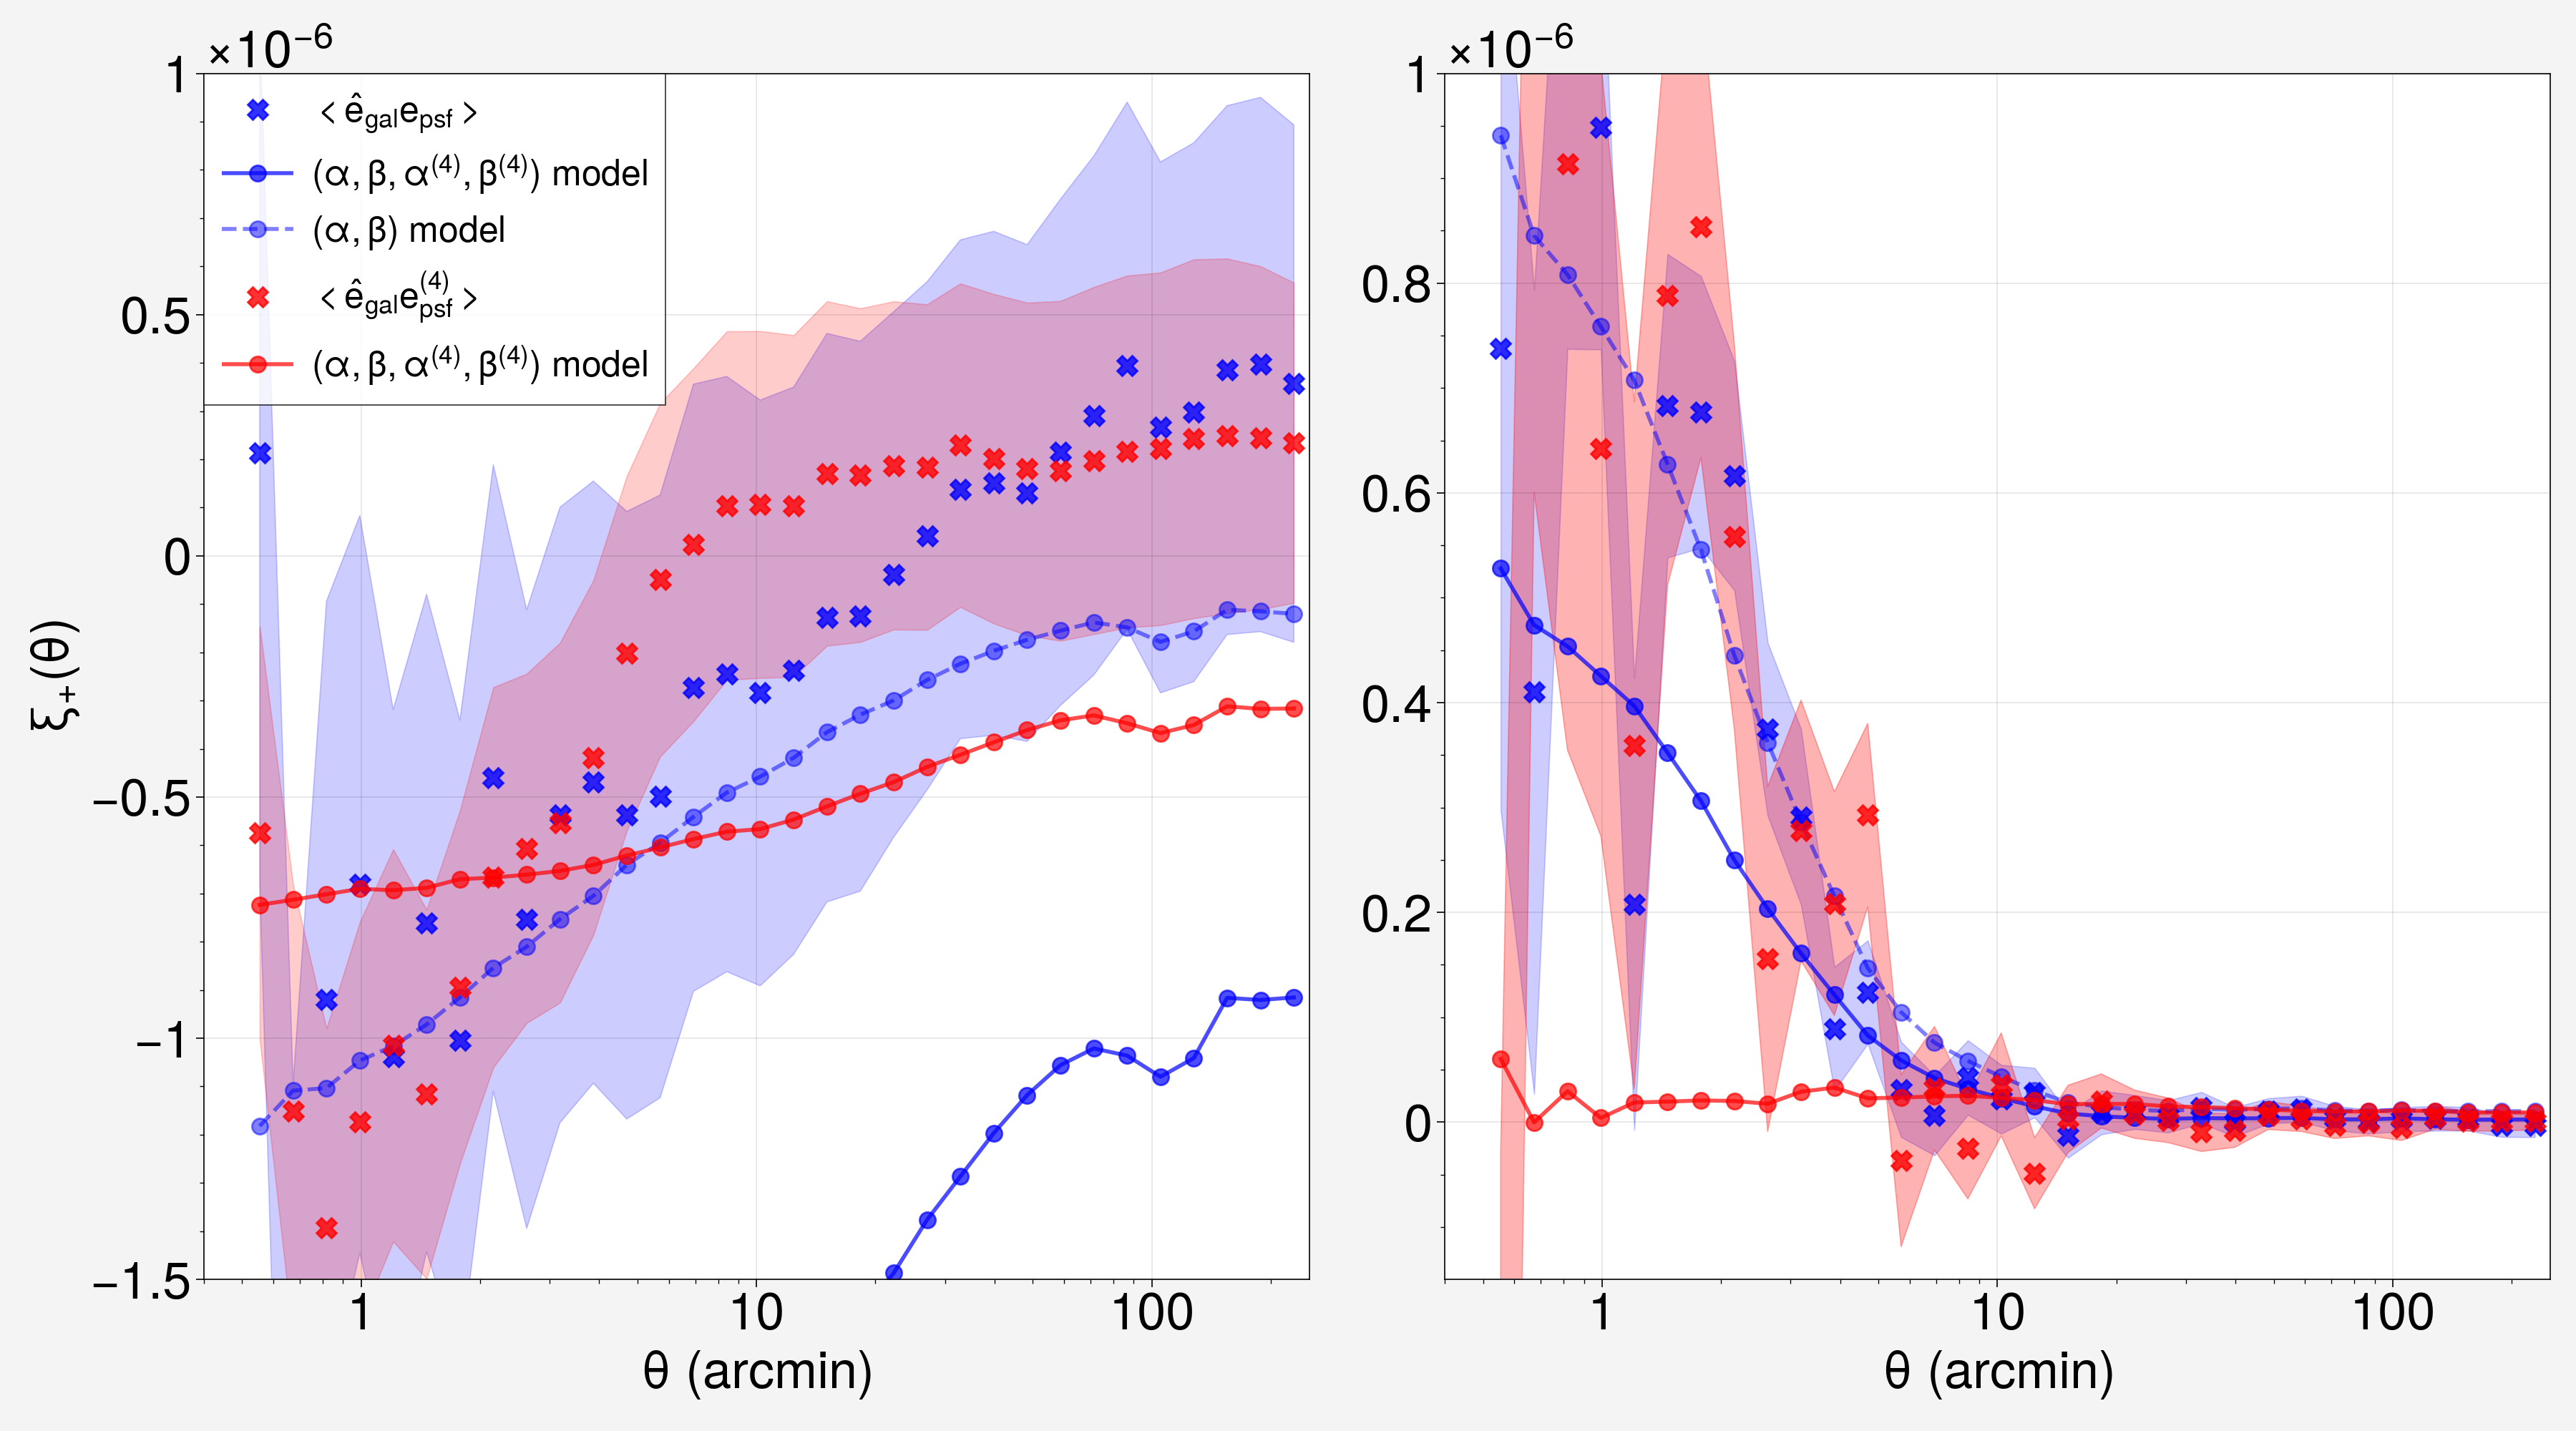

In [5]:
show_gp_model(fourth_model, fitsecond_model, save=False)

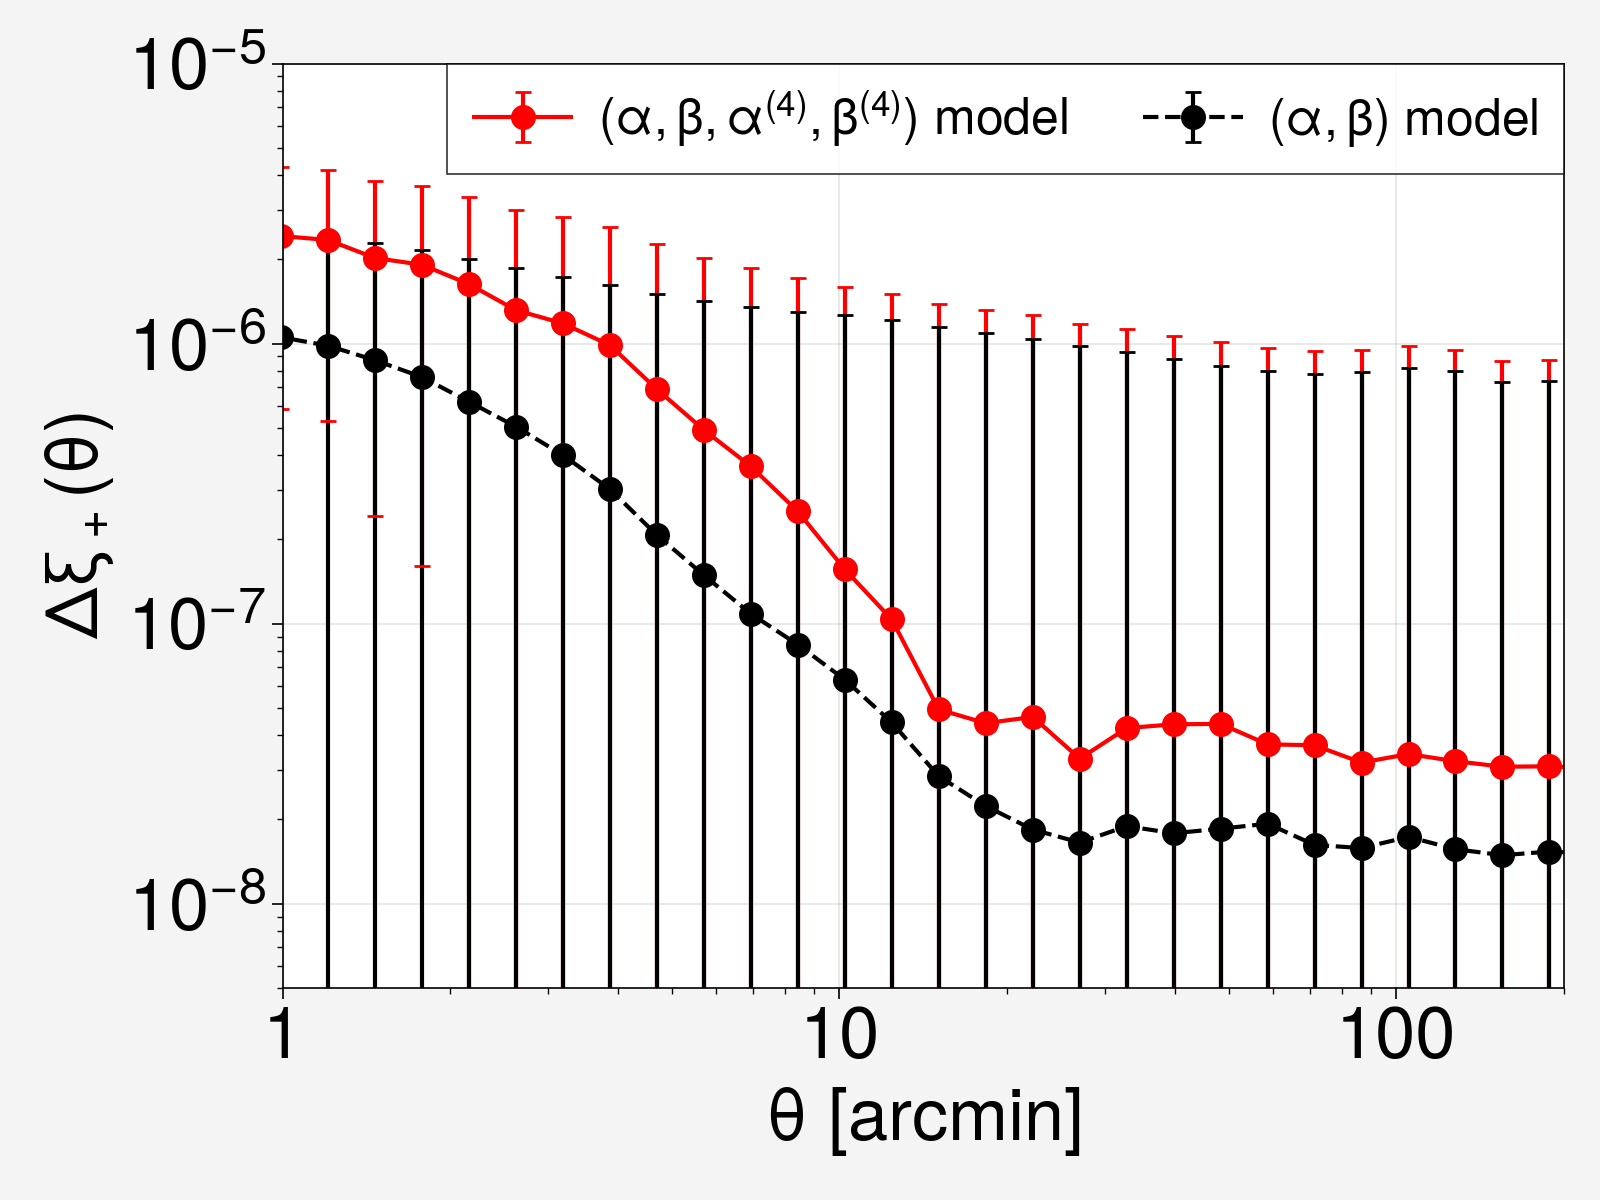

In [7]:
fig,ax=pplt.subplots(nrows=1, ncols=1, figsize=(8,6))

four_param_model = r'($\alpha, \beta, \alpha^{(4)}, \beta^{(4)}$) model'
two_param_model = r'($\alpha, \beta$) model'
ax.errorbar(fourth_model.r, fourth_model.delta_xip, yerr=np.sqrt(np.diag(fourth_model.delta_xip_error())), fmt='o-', color = 'red', label = four_param_model)
ax.errorbar(fitsecond_model.r, fitsecond_model.delta_xip, yerr=np.sqrt(np.diag(fourth_model.delta_xip_error())), fmt = 'o--', color = 'black', label = two_param_model)

ax.set_xlabel('$\\theta$ [arcmin]')
ax.set_ylabel(r'$\Delta \xi_+ (\theta)$')

ax.set_xlim(1, 200)
ax.set_ylim(5e-9, 1e-5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.yticks([1e-8, 1e-7, 1e-6, 1e-5], ['$10^{-8}$', '$10^{-7}$', '$10^{-6}$', '$10^{-5}$'])

ax.legend()
# plt.savefig('/global/homes/m/myamamot/DES/des-y6-analysis/vf_figures/final_v5/psf_systematics_delta_xip_bootstrap_duplicates_ppcov_weight.pdf', bbox_inches='tight')

# chi2, p-value

In [6]:
def numerical_p_value(model):
    
    sample_size = 10000
    
    observe_dv = np.concatenate([model.gp_corr.reshape(-1), model.egal_mean])
    
    mean_dv = observe_dv[model.slice_]

    sample_data_vec = np.random.multivariate_normal( mean_dv , model.new_cov, size = sample_size )

    sample_diff = sample_data_vec - mean_dv
    

    chi2 = np.diag(sample_diff@ model.new_cov_inv @ sample_diff.T)
    
    index = chi2>model.chi2
    
    return np.sum(index)/sample_size

def likelihood_ratio(full_model, nest_model):
    LRT = 2 * ( (-full_model.chi2) - (-nest_model.chi2))
    return LRT

In [10]:
print('fourth model-----------')
print(r'$\alpha$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fourth_model.mean_params[0], fourth_model.err_params['lower'][0], fourth_model.err_params['higher'][0],))
print(r'$\beta$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fourth_model.mean_params[1], fourth_model.err_params['lower'][1], fourth_model.err_params['higher'][1],))
print(r'$\alpha4$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fourth_model.mean_params[2], fourth_model.err_params['lower'][2], fourth_model.err_params['higher'][2],))
print(r'$\beta4$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fourth_model.mean_params[3], fourth_model.err_params['lower'][3], fourth_model.err_params['higher'][3],))
print(fourth_model.chi2, numerical_p_value(fourth_model) , fourth_model.p_value)

print('fitsecond model-----------')
print(r'$\alpha$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fitsecond_model.mean_params[0], fitsecond_model.err_params['lower'][0], fitsecond_model.err_params['higher'][0],))
print(r'$\beta$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fitsecond_model.mean_params[1], fitsecond_model.err_params['lower'][1], fitsecond_model.err_params['higher'][1],))
print(r'$\alpha4$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fitsecond_model.mean_params[2], fitsecond_model.err_params['lower'][2], fitsecond_model.err_params['higher'][2],))
print(r'$\beta4$ = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}'.format(fitsecond_model.mean_params[3], fitsecond_model.err_params['lower'][3], fitsecond_model.err_params['higher'][3],))
print(fitsecond_model.chi2, numerical_p_value(fitsecond_model) , fitsecond_model.p_value)

fourth model-----------
$\alpha$ = -0.0157_{-0.0021}^{0.0021}
$\beta$ = 0.3411_{-0.0323}^{0.0322}
$\alpha4$ = -0.0000_{-0.0000}^{0.0000}
$\beta4$ = -0.0000_{-0.0000}^{0.0000}


NameError: name 'numerical_p_value' is not defined

In [10]:
print(fourth_model.df, fitsecond_model.df)

123 61


In [18]:
80.82244423620253/61

1.3249581022328283

# Check pp correlations @5/28/23

In [63]:
outpath = "/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/median_galaxy_color/more_bins_051623/"
with open(outpath + "full_correlation_psf.pkl", 'rb') as f:
    fourth_model = pickle.load(f)

r = fourth_model[0]
pp_corr = fourth_model[2]
pp_corr_cov = fourth_model[6]

outpath = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/median_galaxy_color/'
d_rho0 = fio.read(os.path.join(outpath, 'ecat_ecat_stats_full.fits'))
d_rho1 = fio.read(os.path.join(outpath, 'qcat_qcat_stats_full.fits'))
d_rho2 = fio.read(os.path.join(outpath, 'ecat_qcat_stats_full.fits'))

Text(0.5, 1.0, 'rho0')

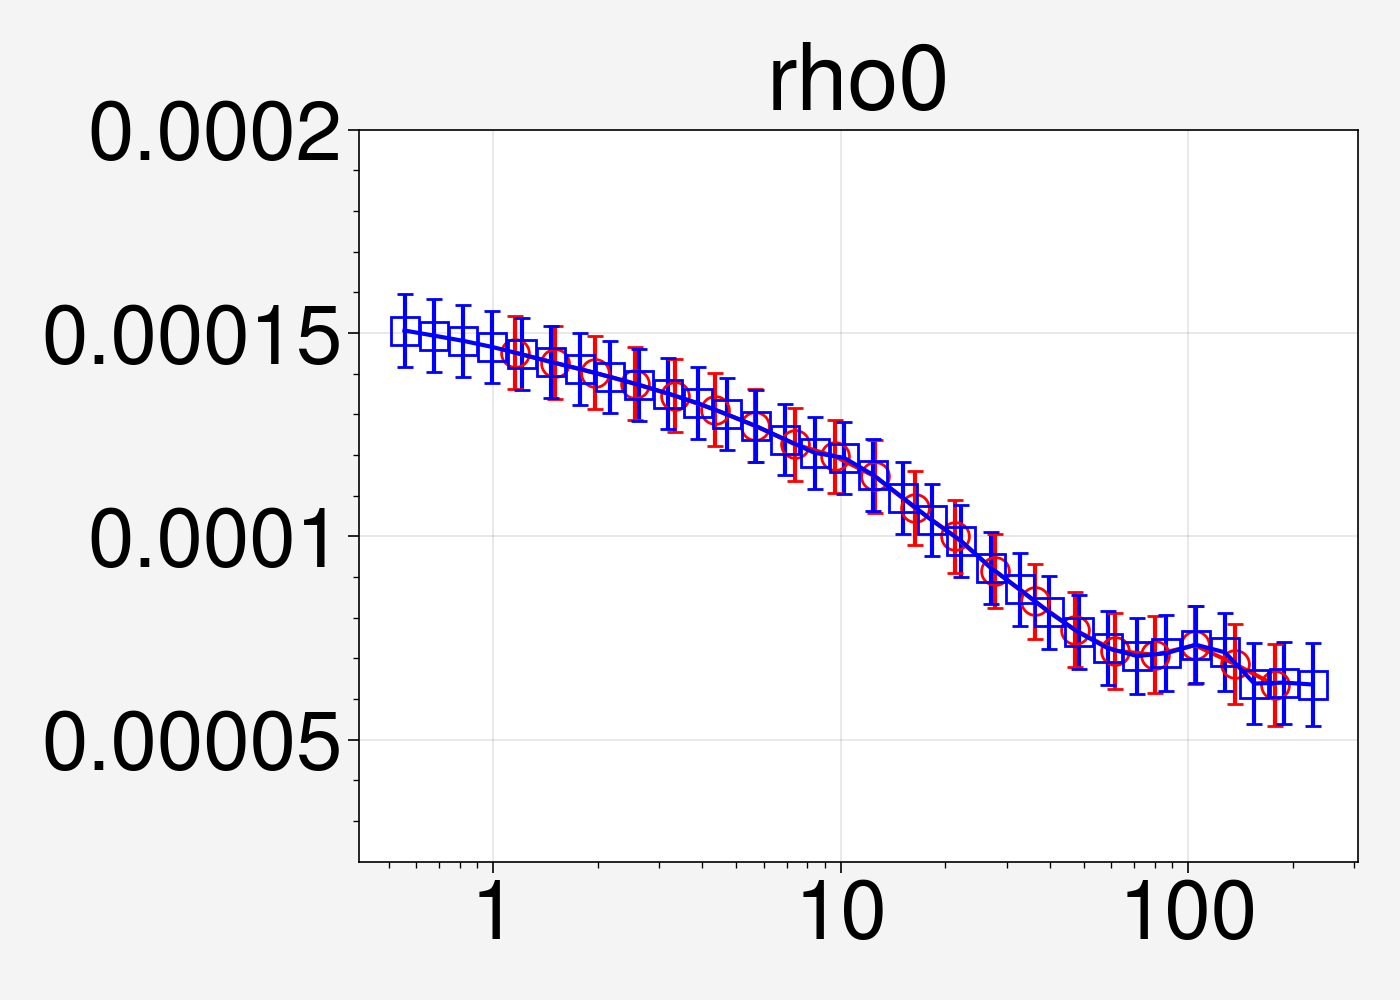

In [74]:
fig,ax=pplt.subplots(figsize=(7,5))
ax.errorbar(r, pp_corr[0][0], yerr=np.sqrt(np.diag(pp_corr_cov[0][0])), fmt='o-', c='r', fillstyle='none')
ax.errorbar(r, -pp_corr[0][0], yerr=np.sqrt(np.diag(pp_corr_cov[0][0])), fmt='o-', c='r', fillstyle='none')
ax.errorbar(d_rho0['meanr'], d_rho0['xip'], yerr=d_rho0['sigma_xip'], fmt='s-', c='b', fillstyle='none')
ax.errorbar(d_rho0['meanr'], -d_rho0['xip'], yerr=d_rho0['sigma_xip'], fmt='s-', c='b', fillstyle='none')

ax.set_xscale('log')
ax.set_ylim(2e-5, 2e-4)
ax.set_title('rho0')

Text(0.5, 1.0, 'rho1')

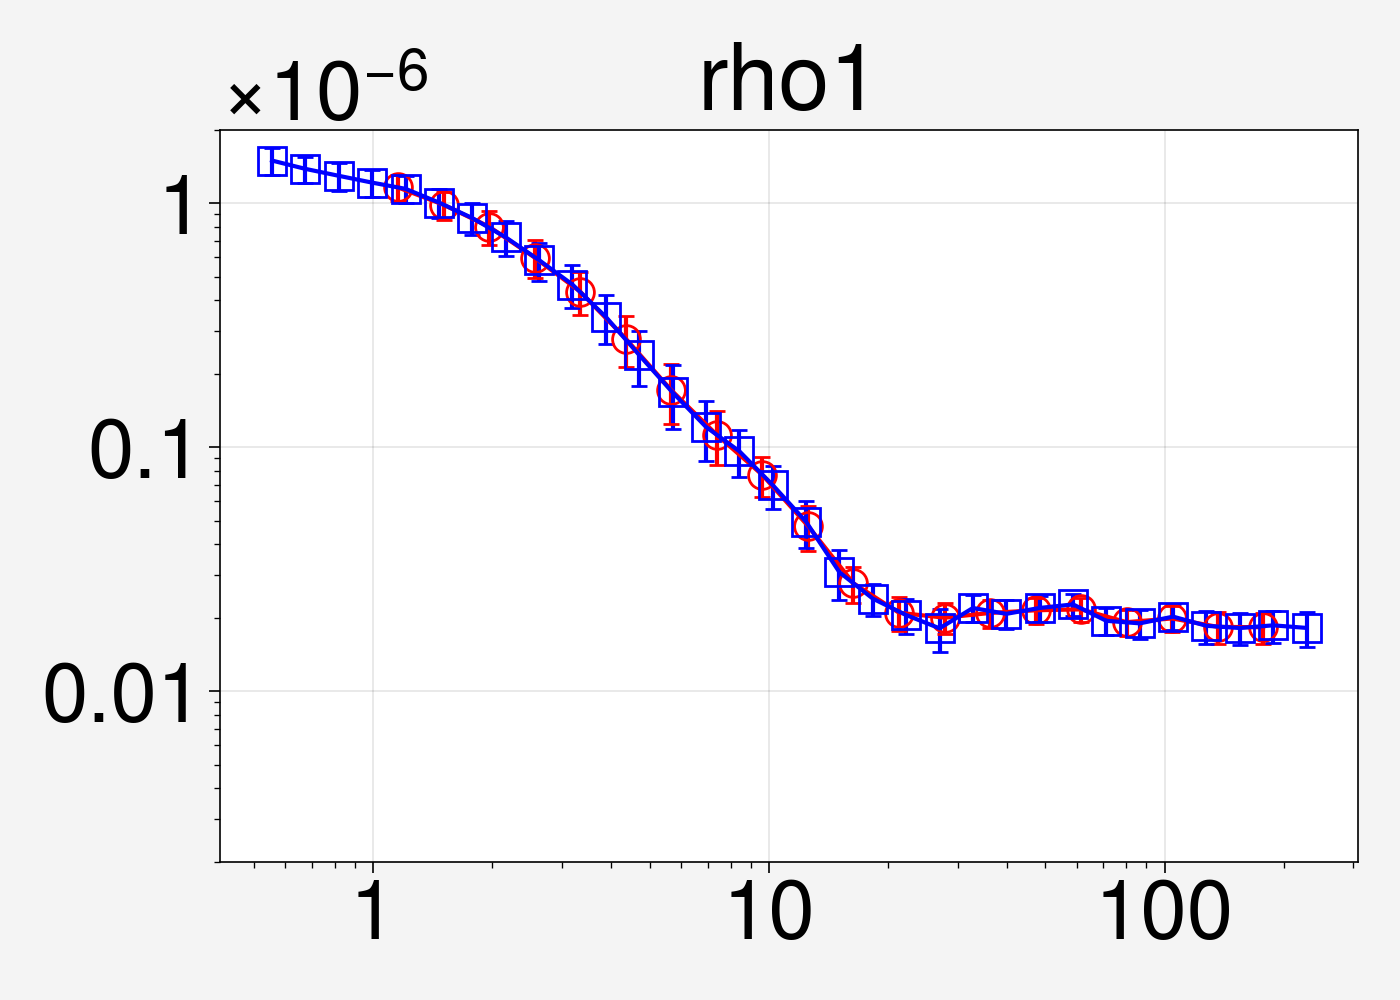

In [84]:
fig,ax=pplt.subplots(figsize=(7,5))
ax.errorbar(r, pp_corr[1][1], yerr=np.sqrt(np.diag(pp_corr_cov[1][1])), fmt='o-', c='r', fillstyle='none')
ax.errorbar(r, -pp_corr[1][1], yerr=np.sqrt(np.diag(pp_corr_cov[1][1])), fmt='o-', c='r', fillstyle='none')

msk = (d_rho1['xip']>0)
ax.errorbar(d_rho1['meanr'][msk], d_rho1['xip'][msk], yerr=d_rho1['sigma_xip'][msk], fmt='s-', c='b', fillstyle='none')
ax.errorbar(d_rho1['meanr'][~msk], -d_rho1['xip'][~msk], yerr=d_rho1['sigma_xip'][~msk], fmt='s-', c='b', fillstyle='none')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(2e-9, 2e-6)
ax.set_title('rho1')

Text(0.5, 1.0, 'rho2')

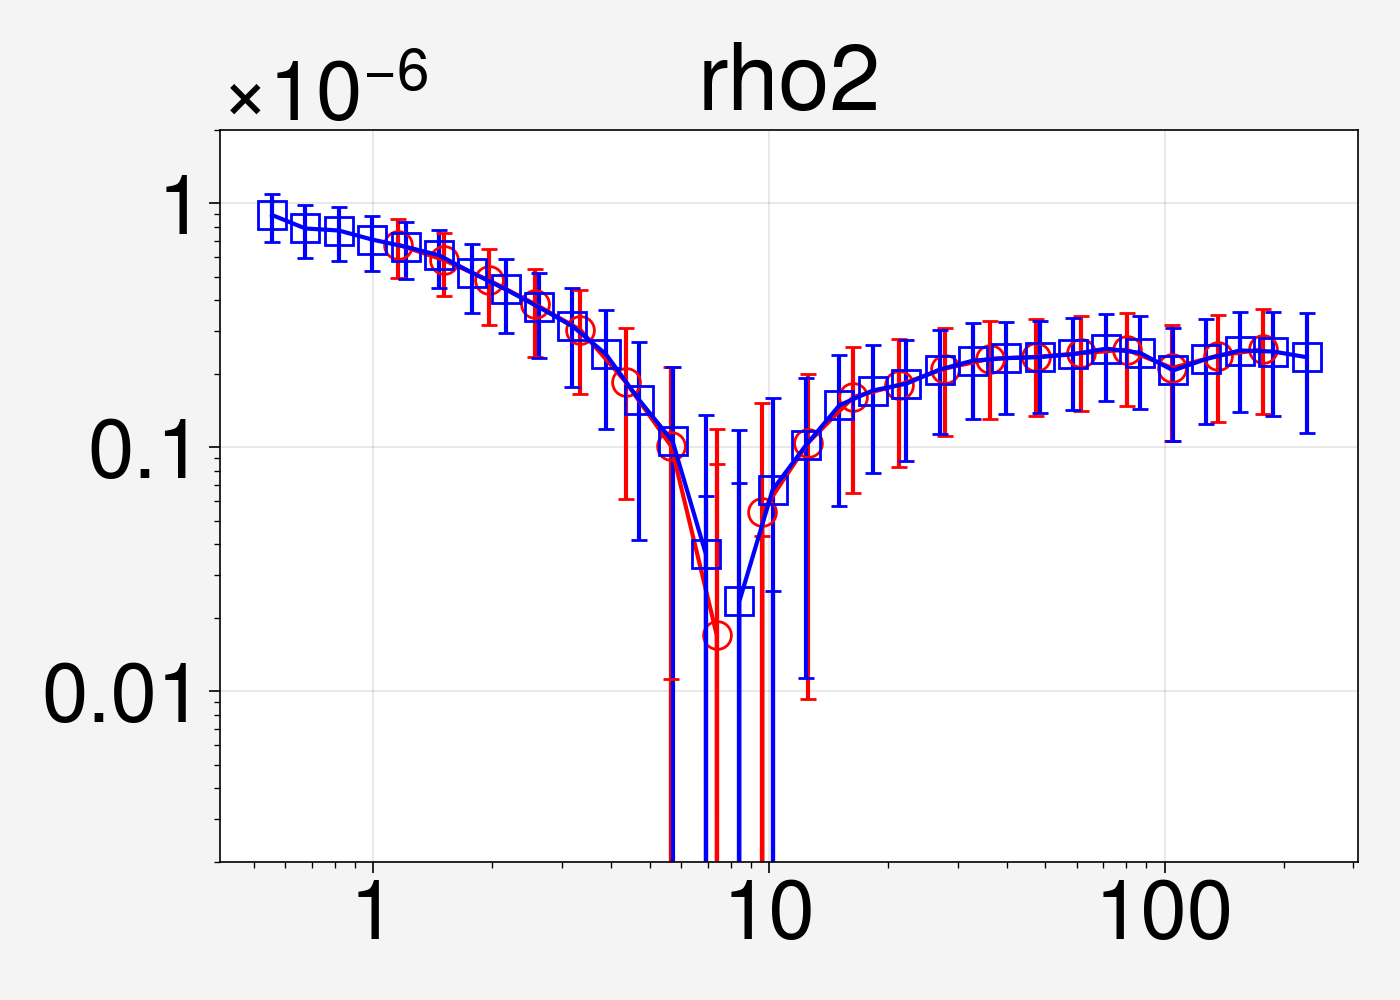

In [83]:
fig,ax=pplt.subplots(figsize=(7,5))
ax.errorbar(r, pp_corr[0][1], yerr=np.sqrt(np.diag(pp_corr_cov[0][1])), fmt='o-', c='r', fillstyle='none')
ax.errorbar(r, -pp_corr[0][1], yerr=np.sqrt(np.diag(pp_corr_cov[0][1])), fmt='o-', c='r', fillstyle='none')
ax.errorbar(d_rho2['meanr'], d_rho2['xip'], yerr=d_rho2['sigma_xip'], fmt='s-', c='b', fillstyle='none')
ax.errorbar(d_rho2['meanr'], -d_rho2['xip'], yerr=d_rho2['sigma_xip'], fmt='s-', c='b', fillstyle='none')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(2e-9, 2e-6)
ax.set_title('rho2')

# Check full covariance @5/28/23

In [91]:
covmat = np.loadtxt('/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/median_galaxy_color/meansubpsf_052723/gp_full_covariance_psf.txt')

In [92]:
covmat.shape

(256, 256)

In [93]:
slice_ = []
for i in range(4):
    slice_.append(np.arange(0, 32) + i*2*32)
slice_ = np.array(slice_).reshape(-1)

In [94]:
slice_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223])

In [95]:
gp_joint_cov = covmat[slice_, :][:, slice_]

In [97]:
gp_joint_cov.shape

(128, 128)

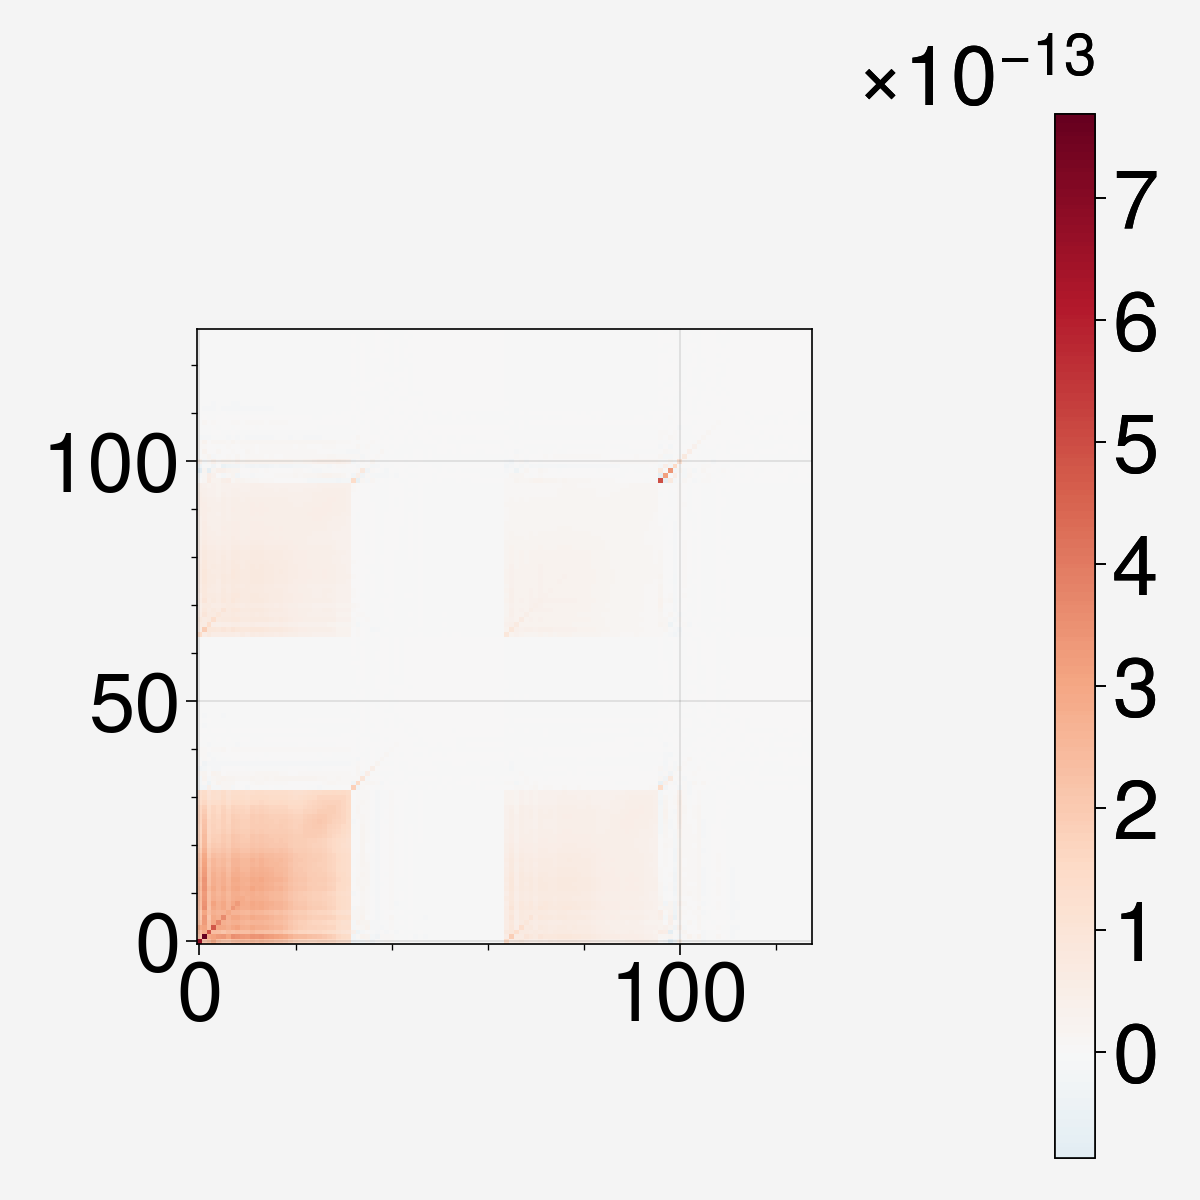

In [90]:
from matplotlib.colors import LogNorm
fig,ax=pplt.subplots(figsize=(6,6))
im=ax.imshow(covmat, origin='lower', )
fig.colorbar(im, ax=ax,)

In [116]:
slice_ = []
for i in range(4):
    slice_.append(np.arange(10, 32) + i*22)
slice_ = np.array(slice_).reshape(-1)

In [117]:
slice_

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97])